# PTID-CDS-JUL-24-2007

# Home Loan Default Prediction - Risk Management

The banking and financial industry plays a crucial role in providing loans to individuals and businesses. However, one of the major challenges faced by financial institutions is the risk of loan defaults, where borrowers fail to meet their repayment obligations. Accurately predicting which customers are likely to default is critical for minimizing financial losses and maintaining a healthy loan portfolio.

In this project, we train different models Logistic regression, Naive Bayes, Decision Tree and Random Forest that can predict whether customers are likely to default on their loans. This will allow financial institutions to make informed decisions regarding loan approvals and risk management.

# Loading the data

## Importing libraries

We start by importing necessary libraries like pandas to handle data manipulation and warnings to ignore any warning messages that might clutter the notebook.

In [247]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

The training data is loaded into a pandas DataFrame (df_train). This dataset contains the features and the target variable, which indicates whether a loan was defaulted or not (TARGET).

In [2]:
df_train = pd.read_csv('C:/Users/DELL/Downloads/PRCP-1006-HomeLoanDef/Data/application_train.csv')

# Splittig the Data

We split the data into training and testing sets. 80% of the data is used for training, and 20% is set aside for testing. The target column (TARGET) is separated from the feature set.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop('TARGET', axis=1)
y = df_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Saving the test set

The test set is saved as a separate CSV file for future use. This allows us to test the model's performance on unseen data after training.

In [ ]:
df_test = X_test.copy()
df_test['TARGET'] = y_test
df_test.to_csv('C:/Users/DELL/Downloads/PRCP-1006-HomeLoanDef/Data/application_test.csv', index=False)

Then lets list the contents of the folder to verify that the test set has been saved correctly, along with other related data files

In [3]:
import os
folder_path = 'C:/Users/DELL/Downloads/PRCP-1006-HomeLoanDef/Data'
print(os.listdir(folder_path))


['.ipynb_checkpoints', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv']


 Lets load the training and test datasets are loaded back into pandas DataFrames from the respective CSV files

In [4]:
df_train = pd.read_csv('C:/Users/DELL/Downloads/PRCP-1006-HomeLoanDef/Data/application_train.csv')
df_test = pd.read_csv('C:/Users/DELL/Downloads/PRCP-1006-HomeLoanDef/Data/application_test.csv')

# Data Preprocessing

## Handling missing values

First lets calculate number of missing values and the percentage of missing values for each feature in the dataset. This helps in identifying which features have significant missing data that may need to be handled

In [5]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

We print the shape (i.e., the number of rows and columns) of both the training and testing datasets.

In [6]:
print("The shape of the training dataset is: {}".format(df_train.shape))
print("The shape of the testing dataset is: {}".format(df_test.shape))

The shape of the training dataset is: (307511, 122)
The shape of the testing dataset is: (61503, 122)


 If a column has more than 50% missing values, it is dropped from both datasets. Dropping these columns is important as they contain too many missing values to be reliably imputed.

In [ ]:
for column in df_train.columns:
    if null_percentage(df_train[column].to_frame())['Percent'][0] > 50.00:
        df_train.drop([column], axis = 1, inplace = True)
        df_test.drop([column], axis = 1, inplace = True)

# Imputation Functions (Mean, Median, and Mode):

Next we use imputtion functions to fill in missing values with appropriate statistical measures,like mean, median or mode

In [8]:
def mean_imputation(data):
    """
    This function would take the NULL values present in data and replace them with average values of the data respectively.
    """
    imputed_data = data.fillna(data.mean()).copy()
    return imputed_data

def median_imputation(data):
    """
    This function would take the NULL values present in data and replace them with median values in our data respectively.
    """
    imputed_data = data.fillna(data.median()).copy()
    return imputed_data

def mode_imputation(data):
    """
    This function would take the NULL values present in data and replace them with mode values of the given data respectively.
    """
    imputed_data = data.fillna(data.mode()).copy()
    return imputed_data

Replacing missing values in features like FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_AVG, etc., to ensure that missing data does not affect model performance.

In [9]:
mean_imputation(df_train['FLOORSMAX_AVG'])
mean_imputation(df_train['FLOORSMAX_MEDI'])
mean_imputation(df_train['FLOORSMAX_MODE'])
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_AVG'])
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MEDI'])
mean_imputation(df_train['YEARS_BEGINEXPLUATATION_MODE'])

0         0.972200
1         0.985100
2         0.977065
3         0.977065
4         0.977065
            ...   
307506    0.978200
307507    0.972700
307508    0.981600
307509    0.977200
307510    0.988100
Name: YEARS_BEGINEXPLUATATION_MODE, Length: 307511, dtype: float64

We filter features with low missing Values. list is created by selecting features that have less than 10% missing values. These features are retained in the dataset for further analysis or modeling.

In [10]:
null_percent_values = null_percentage(df_train)['Percent']
features_with_low_null_values = []
for i in range(len(df_train.columns)):
    if null_percent_values.iloc[i] < 10.0:
        features_with_low_null_values.append(null_percent_values.index[i]) 

In [11]:
df_train_converted = df_train[features_with_low_null_values]

Then we proceed by identifying which columns in the dataset are categorical and which are numeric.

In [12]:
total_columns =df_train_converted.columns 
numeric_data = df_train_converted._get_numeric_data()
categorical_columns = list(set(total_columns) - set(numeric_data.columns))

In [13]:
categorical_data = df_train_converted[categorical_columns]

We then use mode imputation to fill missing values in categorical data with the most frequent value (mode). 

In [14]:
mode_imputation(categorical_data)

,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,NAME_TYPE_SUITE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE
0,WEDNESDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Business Entity Type 3,Single / not married,Cash loans
1,MONDAY,Higher education,Family,House / apartment,N,State servant,F,N,School,Married,Cash loans
2,MONDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,Y,Government,Single / not married,Revolving loans
3,WEDNESDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,F,N,Business Entity Type 3,Civil marriage,Cash loans
4,THURSDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Religion,Single / not married,Cash loans
...,...,...,...,...,...,...,...,...,...,...,...
307506,THURSDAY,Secondary / secondary special,Unaccompanied,With parents,N,Working,M,N,Services,Separated,Cash loans
307507,MONDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Pensioner,F,N,XNA,Widow,Cash loans
307508,THURSDAY,Higher education,Unaccompanied,House / apartment,Y,Working,F,N,School,Separated,Cash loans
307509,WEDNESDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Commercial associate,F,N,Business Entity Type 1,Married,Cash loans


In [15]:
categorical_data['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace = True)

In [16]:
numeric_data.head()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,1,-2120,-3648.0,-637,-9461,0.018801,100002
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,-291,-1186.0,-1188,-16765,0.003541,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,-2531,-4260.0,-225,-19046,0.010032,100004
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,-2437,-9833.0,-3039,-19005,0.008019,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,1,1,0,-3458,-4311.0,-3038,-19932,0.028663,100007


In [17]:
categorical_data.head()

,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,NAME_TYPE_SUITE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE
0,WEDNESDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Business Entity Type 3,Single / not married,Cash loans
1,MONDAY,Higher education,Family,House / apartment,N,State servant,F,N,School,Married,Cash loans
2,MONDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,Y,Government,Single / not married,Revolving loans
3,WEDNESDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,F,N,Business Entity Type 3,Civil marriage,Cash loans
4,THURSDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Religion,Single / not married,Cash loans


To handle mssing values in numeric data we use missingno to visualize missing data patterns in the numeric dataset, allowing us to easily spot the extent of missing data.

In [18]:
import missingno as msno
import matplotlib.pyplot as plt

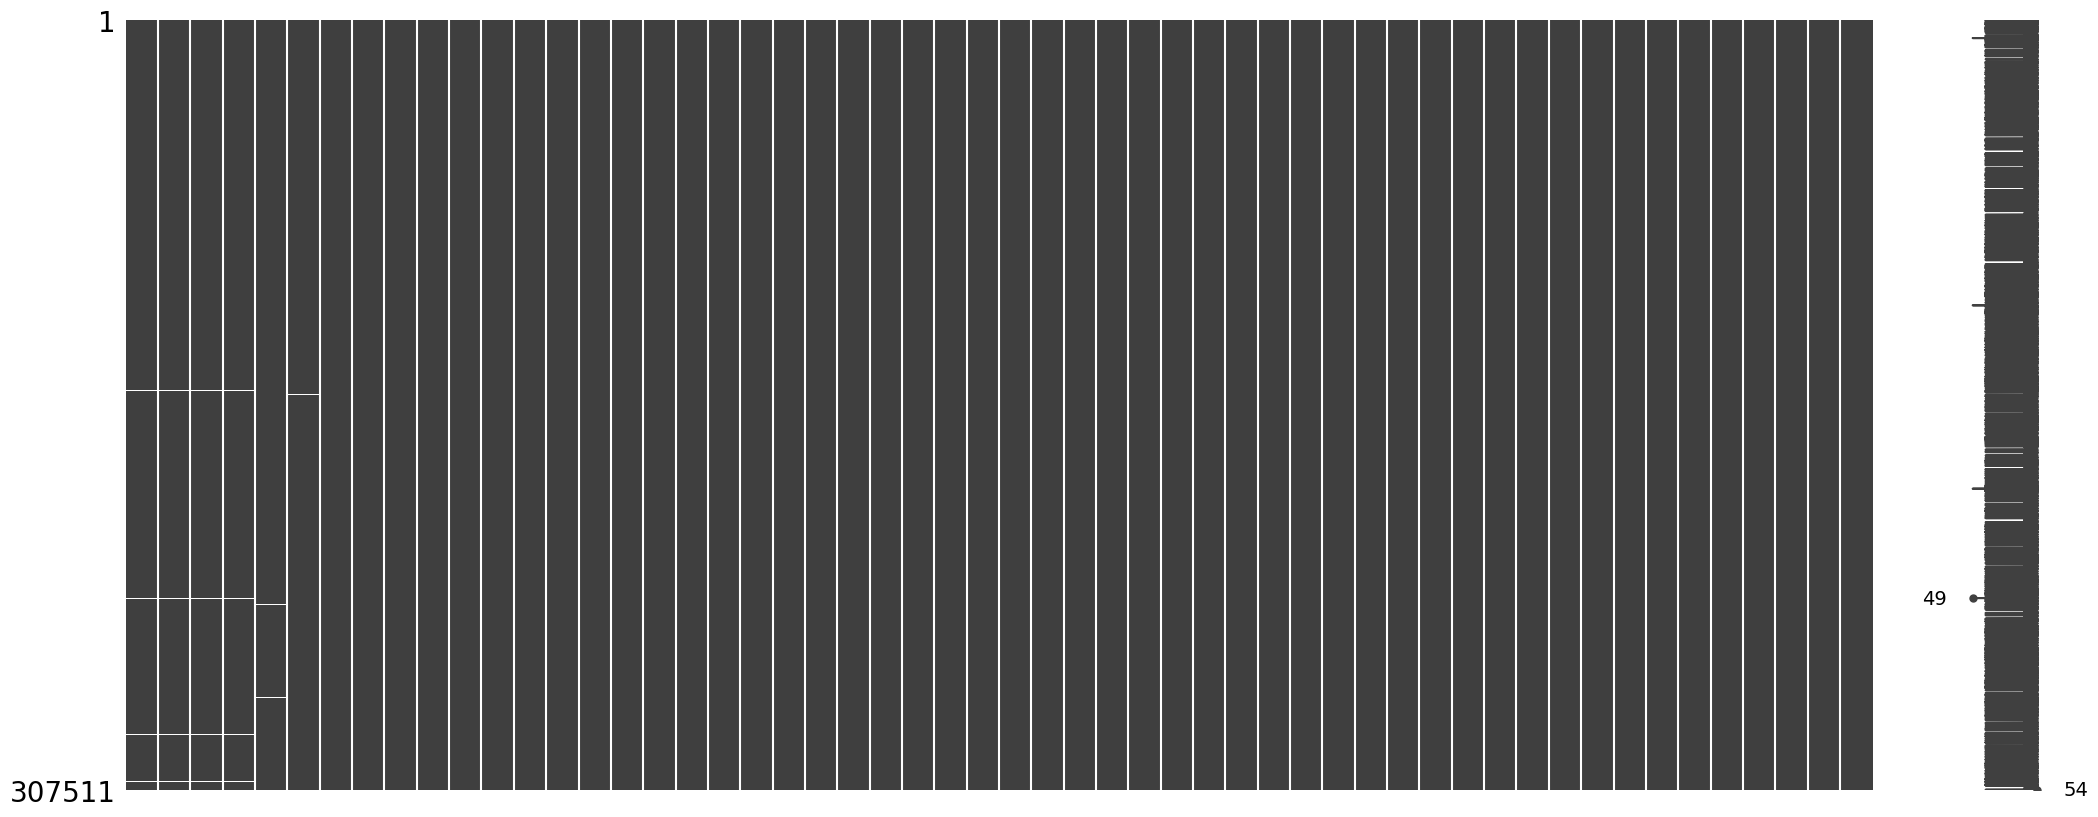

In [19]:
msno.matrix(numeric_data)
plt.show()

A matrix plot generated by missingno.matrix() visualizes missing values in the numeric dataset, giving us an overview of how much and where data is missing

In [20]:
has_missing = numeric_data.isnull().any()
missing_data_columns = numeric_data.columns[has_missing]

In [21]:
missing_data_columns

Index(['DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

Lets print data with features that have missing values

In [22]:
numeric_data[missing_data_columns].head()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0


Missing values in numeric columns are replaced with the mean of the respective column using the mean imputation function. 

In [23]:
mean_imputation(numeric_data[missing_data_columns])

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0
...,...,...,...,...,...,...,...,...,...
307506,0.0,0.0,0.0,0.0,0.681632,225000.0,27558.0,1.0,-273.0
307507,0.0,0.0,0.0,0.0,0.115992,225000.0,12001.5,1.0,0.0
307508,0.0,6.0,0.0,6.0,0.535722,585000.0,29979.0,1.0,-1909.0
307509,0.0,0.0,0.0,0.0,0.514163,319500.0,20205.0,2.0,-322.0


Lets chek if any categorical columns still contain missing values

In [24]:
numeric_data.fillna(numeric_data.mean(), inplace = True)

In [25]:
has_missing = categorical_data.isnull().any()
missing_data_columns = categorical_data.columns[has_missing]

In [26]:
print("The shape of numeric data: {}".format(numeric_data.shape))
print("The shape of categorical data: {}".format(categorical_data.shape))

The shape of numeric data: (307511, 54)
The shape of categorical data: (307511, 11)


## Merging Numeric and Categorical Data

A DataFrame is created by concatenating the imputed numeric data and categorical data. This DataFrame now contains both types of features, ready for modeling. We print the shape to confirm that it includes all 65 columns.

In [27]:
df_final = pd.concat([numeric_data, categorical_data], axis = 1)

In [28]:
df_final.shape

(307511, 65)

In [29]:
df_final.head()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,...,NAME_EDUCATION_TYPE,NAME_TYPE_SUITE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Business Entity Type 3,Single / not married,Cash loans
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,Higher education,Family,House / apartment,N,State servant,F,N,School,Married,Cash loans
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,Y,Government,Single / not married,Revolving loans
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,F,N,Business Entity Type 3,Civil marriage,Cash loans
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Religion,Single / not married,Cash loans


The target variable (TARGET), which indicates whether a loan was defaulted, is separated from the feature columns and used later for model training.

In [30]:
df_final['TARGET']

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

## Splitting the data

The dataset is split into training and testing sets, with 70% of the data used for training the model and 30% reserved for testing. 

In [31]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['TARGET'], axis = 1)
y = df_final['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101,
                                                   test_size = 0.3)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
df_final.head()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,...,NAME_EDUCATION_TYPE,NAME_TYPE_SUITE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Business Entity Type 3,Single / not married,Cash loans
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,Higher education,Family,House / apartment,N,State servant,F,N,School,Married,Cash loans
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,Y,Government,Single / not married,Revolving loans
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,F,N,Business Entity Type 3,Civil marriage,Cash loans
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Religion,Single / not married,Cash loans


In [34]:
categorical_data = df_final.select_dtypes(include = ['object', 'category'])
categorical_data.columns

Index(['WEEKDAY_APPR_PROCESS_START', 'NAME_EDUCATION_TYPE', 'NAME_TYPE_SUITE',
       'NAME_HOUSING_TYPE', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'CODE_GENDER', 'FLAG_OWN_CAR', 'ORGANIZATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE'],
      dtype='object')

## Encoding Categorical Data

Categorical columns are one-hot encoded converting them into numerical format required by machine learning algorithms. Each categorical value is converted into a binary column (0 or 1).

In [35]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X_train_ohe = encoder.fit_transform(X_train.select_dtypes(include = ['object', 'category']))
X_test_ohe = encoder.transform(X_test.select_dtypes(include = ['object', 'category']))

In [36]:
X_train_ohe

<215257x106 sparse matrix of type '<class 'numpy.float64'>'
	with 2367827 stored elements in Compressed Sparse Row format>

Then we concatenate the one-hot encoded categorical features with the numeric features, forming the complete training and testing datasets.

In [37]:
from scipy.sparse import hstack

In [38]:
X_train_ohe = hstack([X_train.select_dtypes(exclude = ['object', 'category']), X_train_ohe])
X_test_ohe = hstack([X_test.select_dtypes(exclude = ['object', 'category']), X_test_ohe])

In [39]:
X_train_ohe

<215257x159 sparse matrix of type '<class 'numpy.float64'>'
	with 7144967 stored elements in COOrdinate format>

In [40]:
X_test_ohe

<92254x159 sparse matrix of type '<class 'numpy.float64'>'
	with 3062262 stored elements in COOrdinate format>

The indices of the target variables are reset to align with the training and test datasets. This step reduces ambiguity when the model is trained on the input data

In [41]:
y_train_reset = y_train.reset_index(drop = True)
y_test_reset = y_test.reset_index(drop = True)

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is where our goal is to understand the data's structure, distribution, and key relationships.

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [43]:
df = pd.read_csv('C:/Users/DELL/Downloads/PRCP-1006-HomeLoanDef/Data/application_train.csv')

Lets print first few rows of the data

In [44]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Lets examine the shape of the dataframe

In [45]:
print("The total shape of the dataframe: {}".format(df.shape))

The total shape of the dataframe: (307511, 122)


## Summary statistics

We then print summary statistics for all numeric columns. This includes the count, mean, standard deviation, minimum, maximum, and quartile values, helping you understand the distribution of the data.

In [46]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [47]:
df['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

We check the distribution of the NAME_CONTRACT_TYPE column, which shows that the majority of loans are "Cash loans" compared to "Revolving loans."

In [48]:
df.columns = [column.lower() for column in df.columns]

In [49]:
df[df.target == 1].shape

(24825, 122)

## Splitting Defaulted and Non-Defaulted Loans

The dataset is split into two parts: defaulted contains the rows where the loan was defaulted (TARGET = 1), and non defaulted contains rows where the loan was not defaulted (TARGET = 0). This allows for separate analysis of customers who defaulted and those who did not.

In [50]:
defaulted_df = df[df.target == 1]
non_defaulted_df = df[df.target == 0]

In [51]:
defaulted_df.shape

(24825, 122)

In [52]:
non_defaulted_df.shape

(282686, 122)

# Count Plot of Contract Types

Count plots are generated using seaborn to visualize the distribution of contract types for both defaulted and non-defaulted loans. This helps us understand the relationship between loan type and default risk.

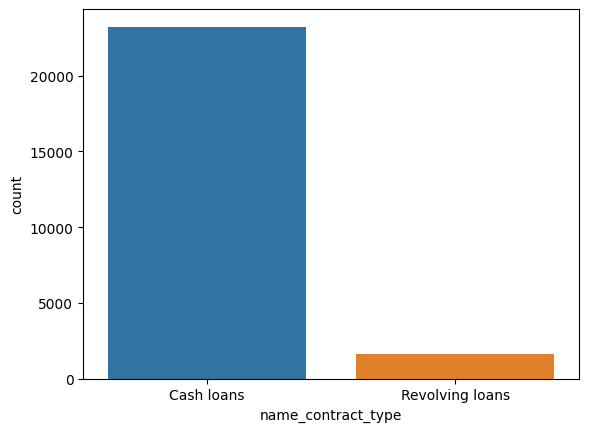

In [53]:
sns.countplot(data = defaulted_df, x = 'name_contract_type')
plt.show()

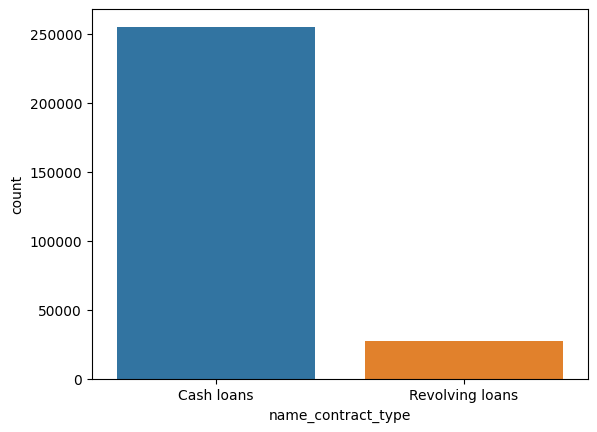

In [54]:
sns.countplot(data = non_defaulted_df, x = 'name_contract_type')
plt.show()

Lets inspect the first few rows of both the entire dataset and the subsets of defaulted and non-defaulted loans. This provides a quick overview of the differences between defaulted and non-defaulted customers.

In [55]:
df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
defaulted_df.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_18,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Count Plot for Car Ownership 

We generate count plot allowing us to compare car ownership between defaulted and non-defaulted groups. 

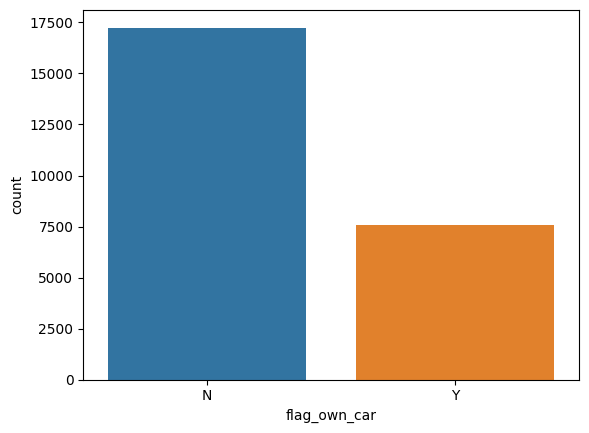

In [57]:
sns.countplot(data = defaulted_df, x = 'flag_own_car')
plt.show()

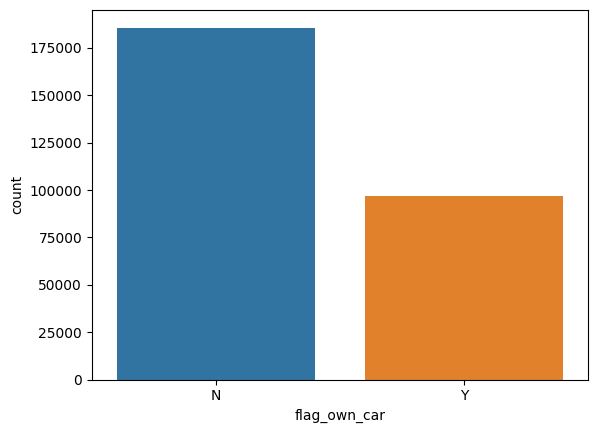

In [58]:
sns.countplot(data = non_defaulted_df, x = 'flag_own_car')
plt.show()

## Count plot for real estate ownership

visualizations are created for realty ownership again for both defaulted and non-defaulted customers. These plots show whether owning real estate has any noticeable effect on defaulting.

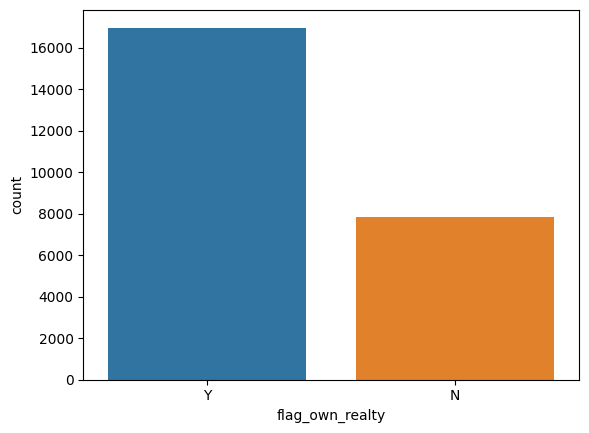

In [59]:
sns.countplot(data = defaulted_df, x = 'flag_own_realty')
plt.show()

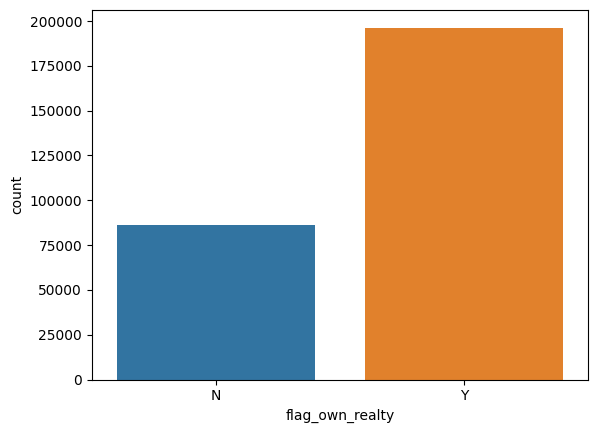

In [60]:
sns.countplot(data = non_defaulted_df, x = 'flag_own_realty')
plt.show()

## Kernel Density Plot for Total Income

We visualize the distribution of total income for both defaulted and non-defaulted customers. This plot helps us see if there are any differences in the income distribution between the two groups

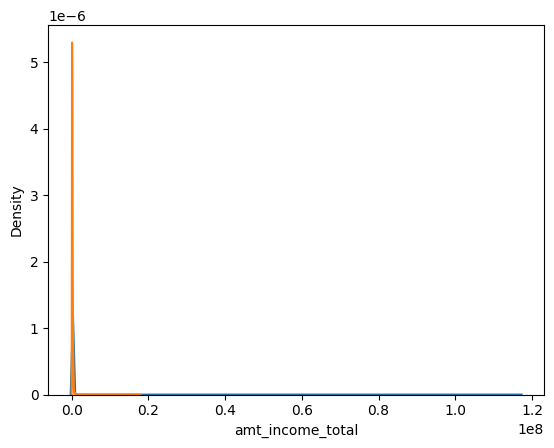

In [61]:
sns.kdeplot(data = defaulted_df, x = 'amt_income_total')

sns.kdeplot(data = non_defaulted_df, x = 'amt_income_total')
plt.show()

In [62]:
threshold_income = 500000
defaulted_income_df = defaulted_df[defaulted_df['amt_income_total'] < threshold_income]
non_defaulted_income_df = non_defaulted_df[non_defaulted_df['amt_income_total'] < threshold_income]

A threshold of 500,000 is applied to both defaulted and non-defaulted customers' total income to filter out very high incomes and remove extreme outliers that might distort the distribution.

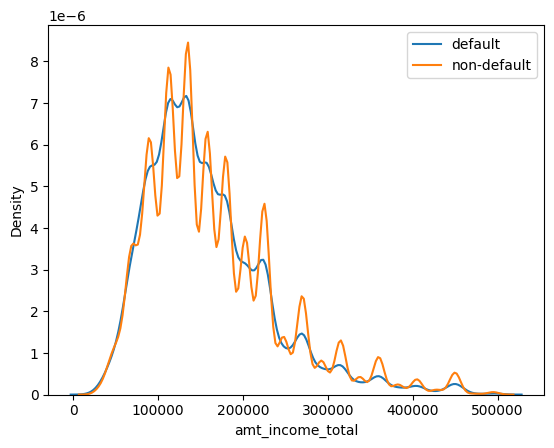

In [63]:
sns.kdeplot(data = defaulted_income_df, x = 'amt_income_total', label = 'default')
sns.kdeplot(data = non_defaulted_income_df, x = 'amt_income_total', label = 'non-default')
plt.legend()
plt.show()

We visualize the distribution of income for defaulted and non-defaulted customers under this threshold. This allows us to compare and understand if income levels play a role in loan defaults.

In [64]:
for column in defaulted_df.columns:
    print(column)

sk_id_curr
target
name_contract_type
code_gender
flag_own_car
flag_own_realty
cnt_children
amt_income_total
amt_credit
amt_annuity
amt_goods_price
name_type_suite
name_income_type
name_education_type
name_family_status
name_housing_type
region_population_relative
days_birth
days_employed
days_registration
days_id_publish
own_car_age
flag_mobil
flag_emp_phone
flag_work_phone
flag_cont_mobile
flag_phone
flag_email
occupation_type
cnt_fam_members
region_rating_client
region_rating_client_w_city
weekday_appr_process_start
hour_appr_process_start
reg_region_not_live_region
reg_region_not_work_region
live_region_not_work_region
reg_city_not_live_city
reg_city_not_work_city
live_city_not_work_city
organization_type
ext_source_1
ext_source_2
ext_source_3
apartments_avg
basementarea_avg
years_beginexpluatation_avg
years_build_avg
commonarea_avg
elevators_avg
entrances_avg
floorsmax_avg
floorsmin_avg
landarea_avg
livingapartments_avg
livingarea_avg
nonlivingapartments_avg
nonlivingarea_avg
apart

## Count Plot for Education Type

 Lets display the distribution of different education levels in the dataset.

In [65]:
df['name_education_type'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: name_education_type, dtype: int64

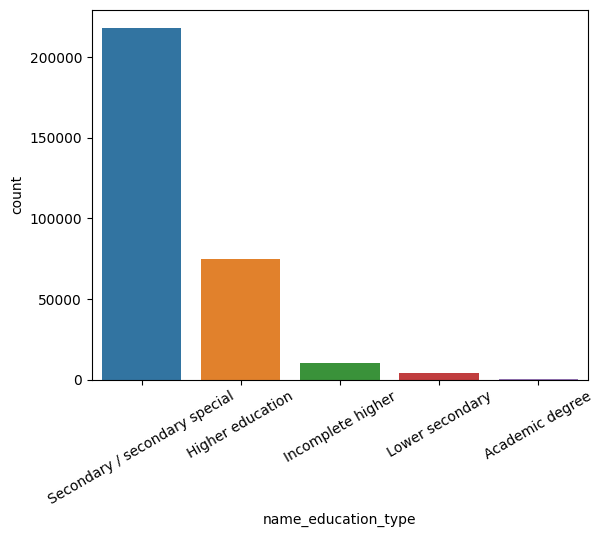

In [66]:
sns.countplot(data = df, x = 'name_education_type')
plt.xticks(rotation = 30)
plt.show()

This visualization helps us understand how education levels are distributed among the loan applicants.

In [67]:
df['name_education_type'].value_counts().values

array([218391,  74863,  10277,   3816,    164], dtype=int64)

In [68]:
df['name_education_type'].value_counts().index

Index(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype='object')

In [69]:
total = sum(df['name_education_type'].value_counts().values)

We will plot a pie chart for a breakdown of the proportion of customers in each education category.

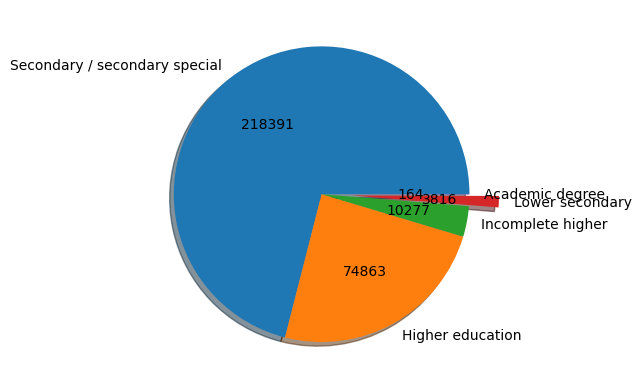

In [70]:
plt.pie(df['name_education_type'].value_counts().values,
       labels = df['name_education_type'].value_counts().index,
        autopct = lambda p: '{:.0f}'.format(p * total / 100),
       startangle = 0, explode = [0, 0, 0, 0.2, 0],
       shadow = True)
plt.show()

In [71]:
defaulted_df['name_education_type'].value_counts()

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: name_education_type, dtype: int64

Lets plot another pie chart to visualize the distribution of education levels among customers who defaulted. 

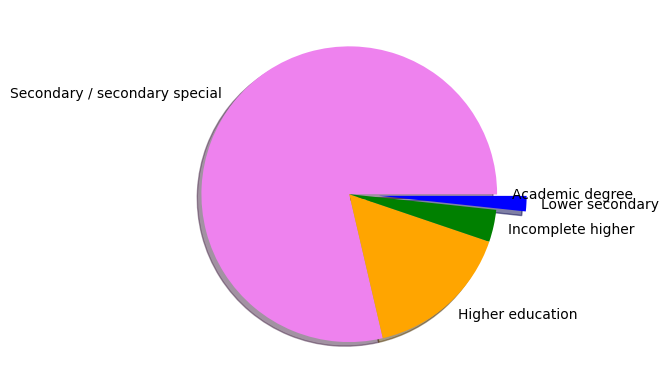

In [72]:
mycolors = ['violet', 'orange', 'green', 'blue', 'purple']
plt.pie(defaulted_df['name_education_type'].value_counts().values,
       labels = defaulted_df['name_education_type'].value_counts().index,
       explode = [0, 0, 0, 0.2, 0],
       shadow = True, colors = mycolors)
plt.show()

Lets continue by importing essential libraries for data manipulation and visualization and oad te data again

In [73]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import os
import gc
warnings.filterwarnings('ignore')

In [74]:
df_train = pd.read_csv('C:/Users/DELL/Downloads/PRCP-1006-HomeLoanDef/Data/application_train.csv')
df_test = pd.read_csv('C:/Users/DELL/Downloads/PRCP-1006-HomeLoanDef/Data/application_test.csv')
gc.collect()

18018

In [75]:
print("The type of data that is present based on different features is:")
df_train.dtypes.value_counts()

The type of data that is present based on different features is:


float64    65
int64      41
object     16
dtype: int64

In [76]:
df_train.shape

(307511, 122)

In [77]:
df_train.select_dtypes('object').head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


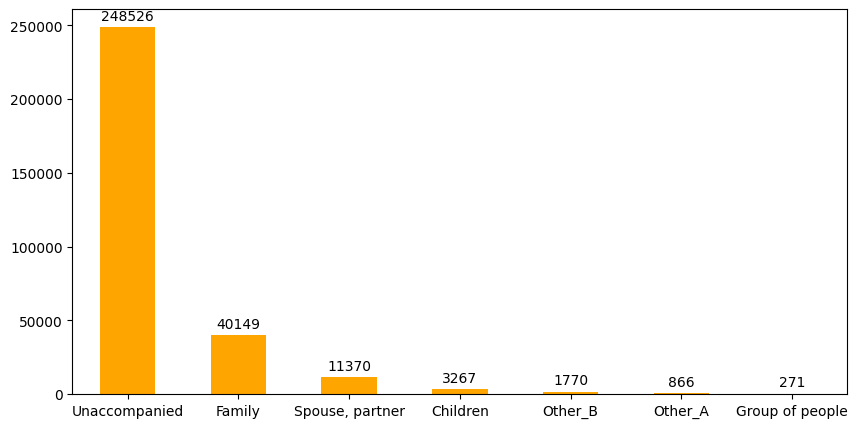

In [78]:
plt.figure(figsize = (10, 5))
plots = df_train['NAME_TYPE_SUITE'].value_counts().plot(kind = 'bar', color = 'orange')
for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation = 0)
plt.show()

Then a bar plot is created to visualize the distribution of the NAME_TYPE_SUITE column, which shows the family relationship status of the customer during the loan application.

In [79]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Another bar plot is created to visualize the distribution of the target variable (TARGET), which indicates whether a customer defaulted on their loan.

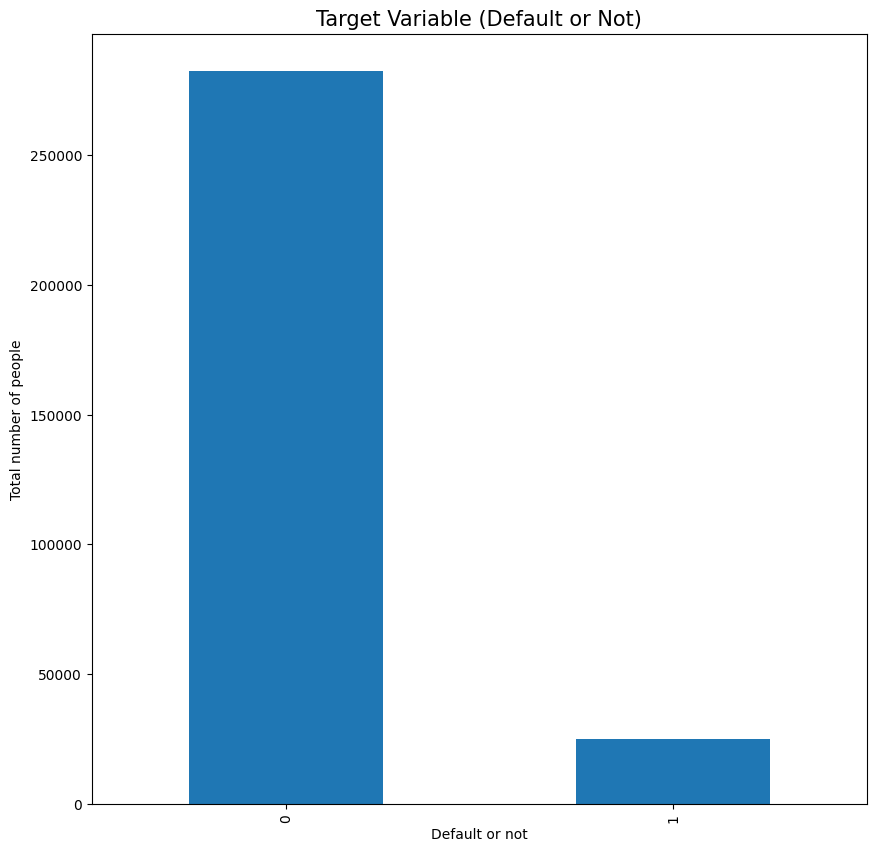

In [80]:
plt.figure(figsize = (10, 10))
plt.title("Target Variable (Default or Not)", fontsize = 15)
plt.xlabel("Default or not")
plt.ylabel("Total number of people")
df_train['TARGET'].value_counts().plot(kind = 'bar')
plt.show()

**Observation**:

It would be seen that there is a wide gap between the number of people who have defaulted on a loan compared to the total number of people who have not defaulted on a loan.
The total number of people who have defaulted on a loan are about 4,000 while the people who did not default on a loan are around 25,00,000.
Below we are going to be checking if there are NULL values present in our data. We see that there are quite a few null values present in our occupation type. Those values are printed below as can be seen.

Lets check for some null values specifically on the OCCUPATION_TYPE feature"

In [81]:
print("Are there any null values for the occupation type?\n")
if any(df_train['OCCUPATION_TYPE'].isnull()):
    print("Yes, there are null values for occupation type feature")
else:
    print("No, there are no null values for occupation type feature")

Are there any null values for the occupation type?

Yes, there are null values for occupation type feature


In [82]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

In [83]:
null_percentage(df_train[['NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']])

,Total,Percent
OCCUPATION_TYPE,96391,31.345545
NAME_HOUSING_TYPE,0,0.000000


In [84]:
null_percentage(df_train)[0: 30]

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [85]:
import missingno as msno

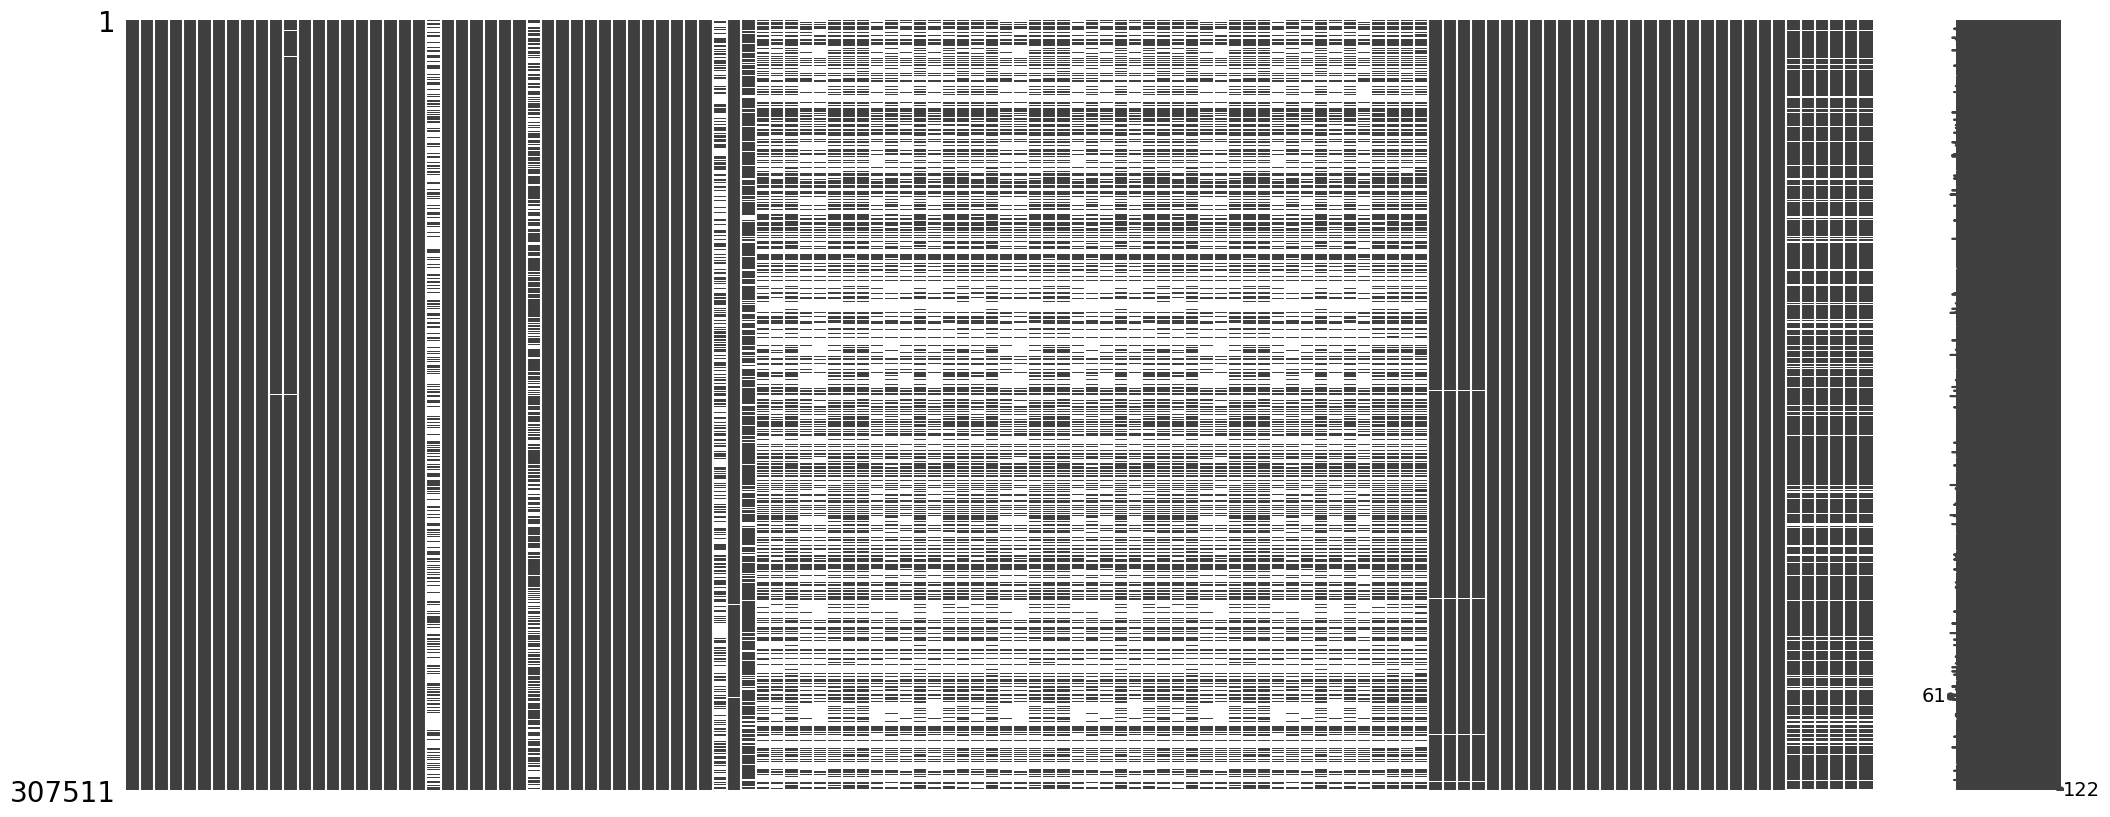

In [86]:
msno.matrix(df_train)
plt.show()

We once again visualize the missing values for the entire dataset this time, showing which features have missing data. 

## Exploring a Numeric Column

We wil explore AMT_GOODS_PRICE column, showing how much goods or assets are valued in the dataset. This is important to explore because it could affect loan defaults depending on the value of assets associated with the loan.

In [87]:
df_train.select_dtypes('float')['AMT_GOODS_PRICE']

0          351000.0
1         1129500.0
2          135000.0
3          297000.0
4          513000.0
            ...    
307506     225000.0
307507     225000.0
307508     585000.0
307509     319500.0
307510     675000.0
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [88]:
len(df_train)

307511

In [89]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,384575,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,214010,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,0
2,142232,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,495000.0,...,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0,0
3,389171,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,225000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,283617,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,234000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0


In [91]:
print("The shape of the training dataset is: {}".format(df_train.shape))
print("The shape of the testing dataset is: {}".format(df_test.shape))

The shape of the training dataset is: (307511, 122)
The shape of the testing dataset is: (61503, 122)


In [92]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
df_train.select_dtypes('float').shape

(307511, 65)

In [94]:
df_train.select_dtypes('float')

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-8456.0,NaN,1.0,0.145570,0.681632,...,0.0,0.0,0.0,-273.0,NaN,NaN,NaN,NaN,NaN,NaN
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-4388.0,NaN,1.0,NaN,0.115992,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-6737.0,NaN,1.0,0.744026,0.535722,...,0.0,6.0,0.0,-1909.0,1.0,0.0,0.0,1.0,0.0,1.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-2562.0,NaN,2.0,NaN,0.514163,...,0.0,0.0,0.0,-322.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets calculate and display both the total number of missing values and the percentage of missing values for each column in the dataset.

In [95]:
def null_percentage(data):
    null_values_total = data.isnull().sum().sort_values(ascending = False)
    total_null_percent = (data.isnull().sum()/data.isnull().count() * 100).sort_values(ascending = False)
    return pd.concat([null_values_total, total_null_percent], axis = 1, keys = ['Total', 'Percent'])

In [96]:
null_percentage(df_train).iloc[0: 5]

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963


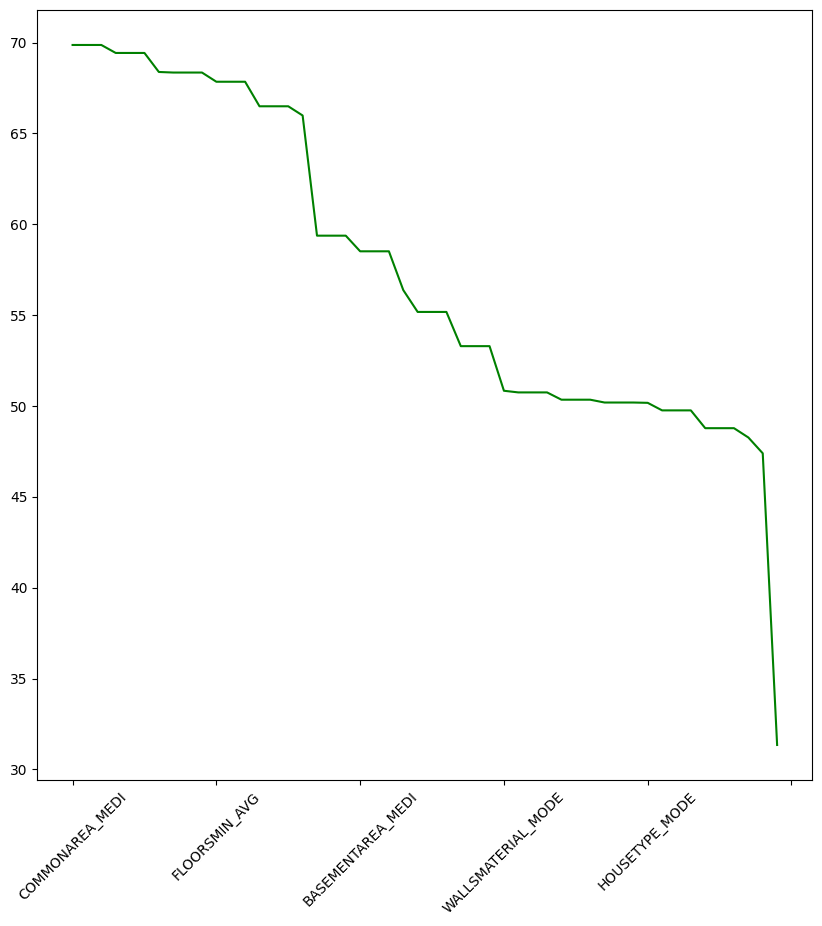

In [97]:
plt.figure(figsize = (10, 10))
null_percentage(df_train).iloc[0: 50]['Percent'].plot(color = 'green')
plt.xticks(rotation = 45)
plt.show()

A plot is created to visualize the percentage of missing values for the top 50 features with the highest proportion of missing data. This provides a quick view of which columns may need to be addressed before model building.

## Dropping Columns with High Missing Values

The code loops through all columns and drops those where more than 50% of the data is missing. This is necessary because features with too many missing values are unlikely to provide useful information for the model and could harm performance.

In [98]:
for column in df_train.columns:
    if null_percentage(df_train[column].to_frame())['Percent'][0] > 50.00:
        df_train.drop([column], axis = 1, inplace = True)

In [99]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
df_train.shape

(307511, 81)

In [101]:
null_percentage(df_train).iloc[0: 30]

,Total,Percent
FLOORSMAX_AVG,153020,49.760822
FLOORSMAX_MODE,153020,49.760822
FLOORSMAX_MEDI,153020,49.760822
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019
YEARS_BEGINEXPLUATATION_MEDI,150007,48.781019
TOTALAREA_MODE,148431,48.268517
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
EXT_SOURCE_3,60965,19.825307


In [102]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
(df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False).iloc[0: 20]

FLOORSMAX_AVG                   0.497608
FLOORSMAX_MODE                  0.497608
FLOORSMAX_MEDI                  0.497608
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_MEDI    0.487810
TOTALAREA_MODE                  0.482685
EMERGENCYSTATE_MODE             0.473983
OCCUPATION_TYPE                 0.313455
EXT_SOURCE_3                    0.198253
AMT_REQ_CREDIT_BUREAU_YEAR      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
AMT_REQ_CREDIT_BUREAU_DAY       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK      0.135016
AMT_REQ_CREDIT_BUREAU_MON       0.135016
AMT_REQ_CREDIT_BUREAU_QRT       0.135016
NAME_TYPE_SUITE                 0.004201
DEF_30_CNT_SOCIAL_CIRCLE        0.003320
OBS_60_CNT_SOCIAL_CIRCLE        0.003320
DEF_60_CNT_SOCIAL_CIRCLE        0.003320
dtype: float64

In [104]:
count = 0
for i in range(len(df_train)):
    if df_train.iloc[i].isnull()[0] == True:
        count = count + 1

In [105]:
df_train.iloc[0].isnull()[0]

False

In [106]:
Number_of_rows_dropped = df_train.shape[0] - df_train.dropna().shape[0]
print("The total number of rows dropped is {}".format(Number_of_rows_dropped))
print("The percentage of rows dropped is {}%".format(np.round(Number_of_rows_dropped / len(df_train) * 100, 3)))

The total number of rows dropped is 222936
The percentage of rows dropped is 72.497%


In [107]:
df_train.shape

(307511, 81)

In [108]:
df_train.dropna().shape

(84575, 81)

In [109]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
(df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False).iloc[0: 20]

FLOORSMAX_AVG                   0.497608
FLOORSMAX_MODE                  0.497608
FLOORSMAX_MEDI                  0.497608
YEARS_BEGINEXPLUATATION_AVG     0.487810
YEARS_BEGINEXPLUATATION_MODE    0.487810
YEARS_BEGINEXPLUATATION_MEDI    0.487810
TOTALAREA_MODE                  0.482685
EMERGENCYSTATE_MODE             0.473983
OCCUPATION_TYPE                 0.313455
EXT_SOURCE_3                    0.198253
AMT_REQ_CREDIT_BUREAU_YEAR      0.135016
AMT_REQ_CREDIT_BUREAU_HOUR      0.135016
AMT_REQ_CREDIT_BUREAU_DAY       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK      0.135016
AMT_REQ_CREDIT_BUREAU_MON       0.135016
AMT_REQ_CREDIT_BUREAU_QRT       0.135016
NAME_TYPE_SUITE                 0.004201
DEF_30_CNT_SOCIAL_CIRCLE        0.003320
OBS_60_CNT_SOCIAL_CIRCLE        0.003320
DEF_60_CNT_SOCIAL_CIRCLE        0.003320
dtype: float64

We select a subset of columns that capture how frequently a customer’s credit has been checked over various time periods, which can indicate the customer’s credit seeking behavior and may be predictive of their likelihood to default on a loan.

In [115]:
df_train[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON']]

,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
307506,NaN,NaN,NaN,NaN,NaN,NaN
307507,NaN,NaN,NaN,NaN,NaN,NaN
307508,1.0,0.0,1.0,0.0,0.0,1.0
307509,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].unique()

array([ 1.,  0., nan,  2.,  4.,  5.,  3.,  8.,  6.,  9.,  7., 10., 11.,
       13., 16., 12., 25., 23., 15., 14., 22., 17., 19., 18., 21., 20.])

In [117]:
df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].unique()

array([ 0., nan,  1.,  3.,  2.,  4.,  5.,  6.,  8.,  7.])

These columns allow us to analyze customer behavior based on how often they have requested credit checks. For instance, frequent credit inquiries in a short time span might indicate financial stress, which could increase the risk of defaulting on loans. 

## Countplot of amt_req_credit_bureau_year

<Axes: >

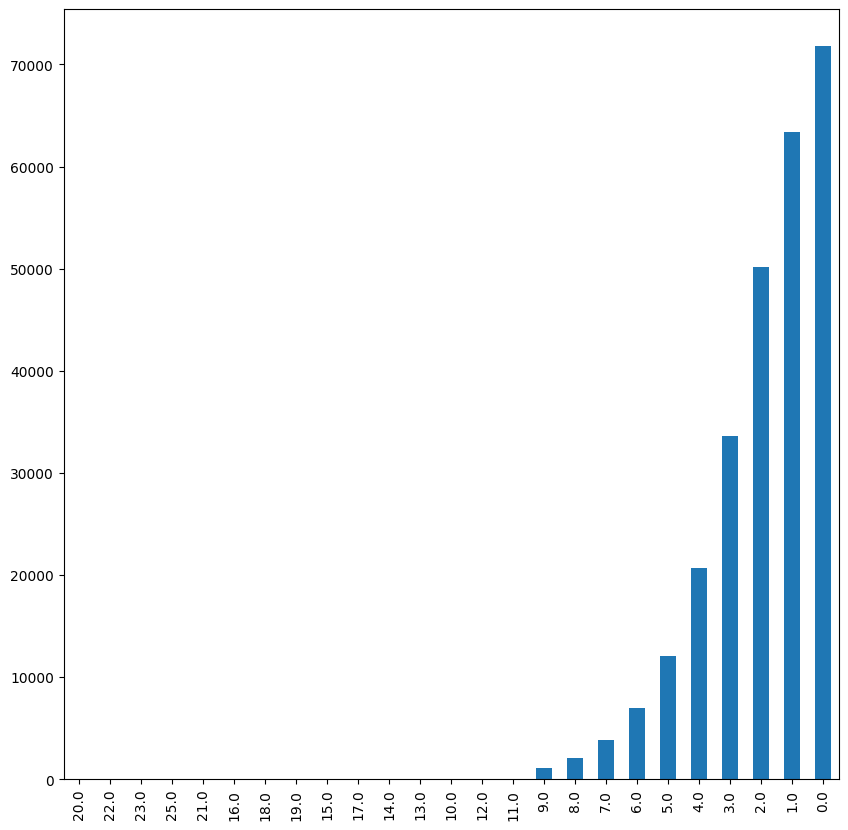

In [118]:
plt.figure(figsize = (10, 10))
df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts().sort_values(ascending = True).plot(kind = 'bar')

## Countplot of amt_req_credit_bureau_hour

<Axes: >

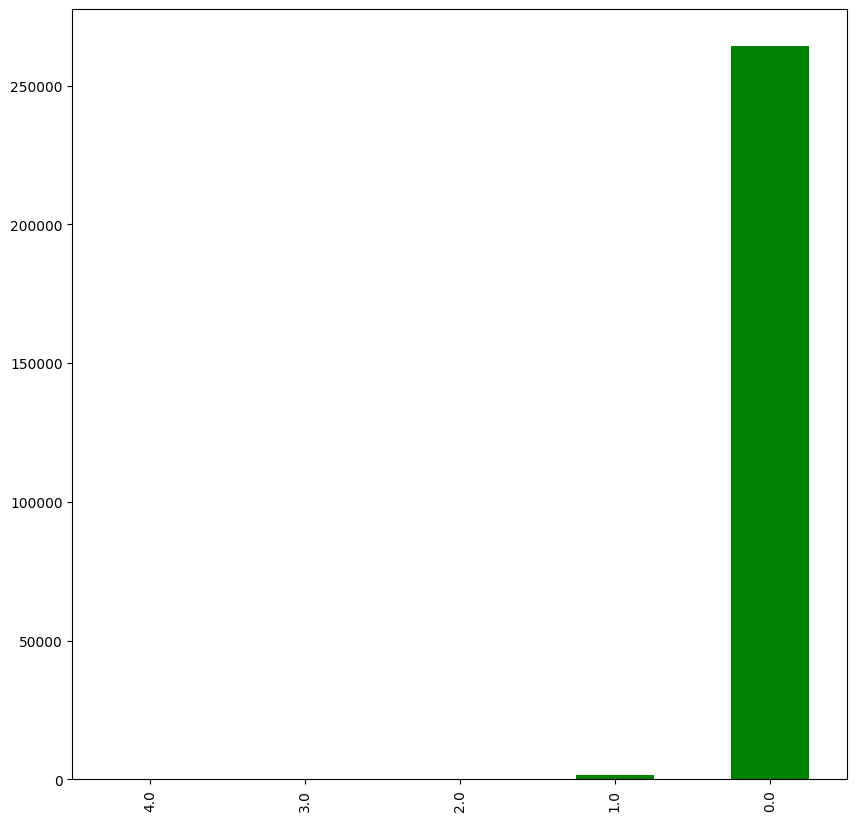

In [119]:
plt.figure(figsize = (10, 10))
df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts().sort_values(ascending = True).plot(kind = 'bar', color = 'green')

In [120]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Countplot of amt_req_credit_bureau_qrt

<Axes: >

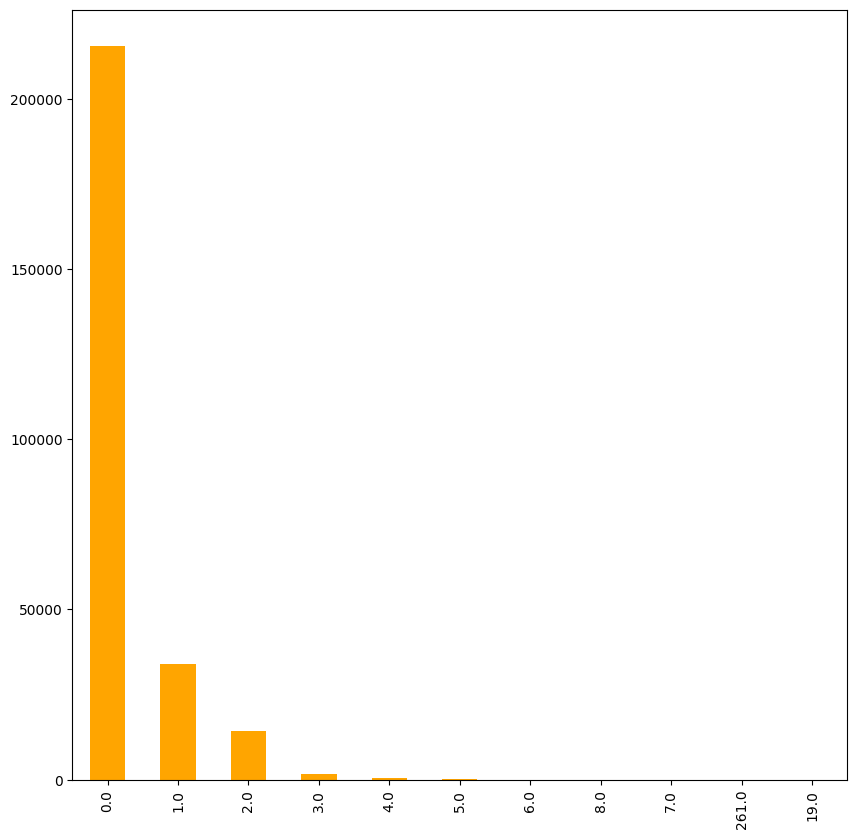

In [121]:
plt.figure(figsize = (10, 10))
df_train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts().plot(kind = 'bar', color = 'orange')

Each of these visualizations uses a bar chart to show the distribution of values in the respective columns.
These columns represent how often credit inquiries were made within different time frames: in a year, an hour, or a quarter.

## Countplot of NAME_CONTRACT_TYPE

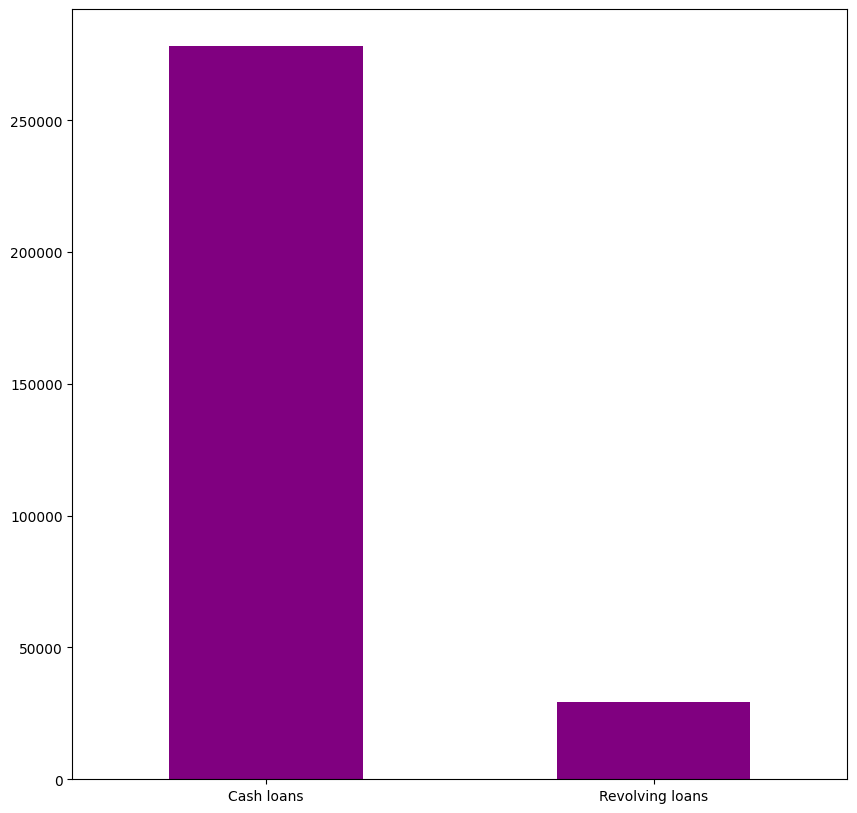

In [123]:
plt.figure(figsize = (10, 10))
df_train['NAME_CONTRACT_TYPE'].value_counts().plot(kind = 'bar', color = 'purple')
plt.xticks(rotation = 0)
plt.show()

## Countplot of CODE_GENDER

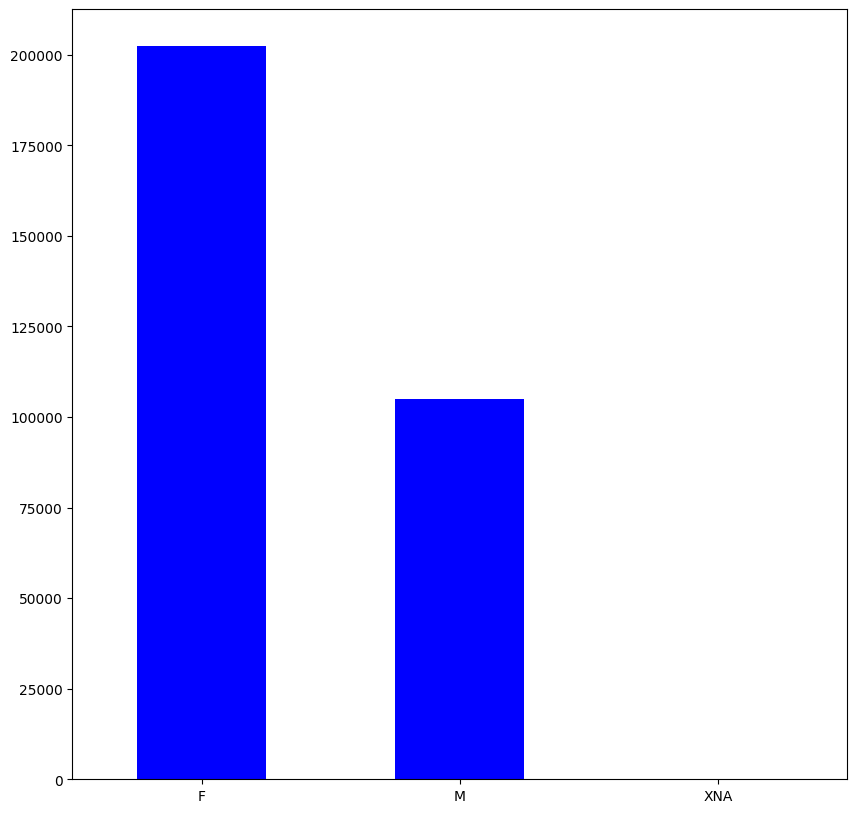

In [124]:
plt.figure(figsize = (10, 10))
df_train['CODE_GENDER'].value_counts().plot(kind = 'bar', color = 'blue')
plt.xticks(rotation = 0)
plt.show()

AME_CONTRACT_TYPE and CODE_GENDER are categorical variables. These visualizations allow us to analyze the frequency of different contract types and gender distributions among loan applicants.

In [125]:
len(df_train[df_train['CODE_GENDER'] == 'XNA'])

4

In [126]:
df_train = df_train[df_train['CODE_GENDER'] != 'XNA']

In [127]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
len(df_train)

307507

## Countplot of FLAG_OWN_REALTY

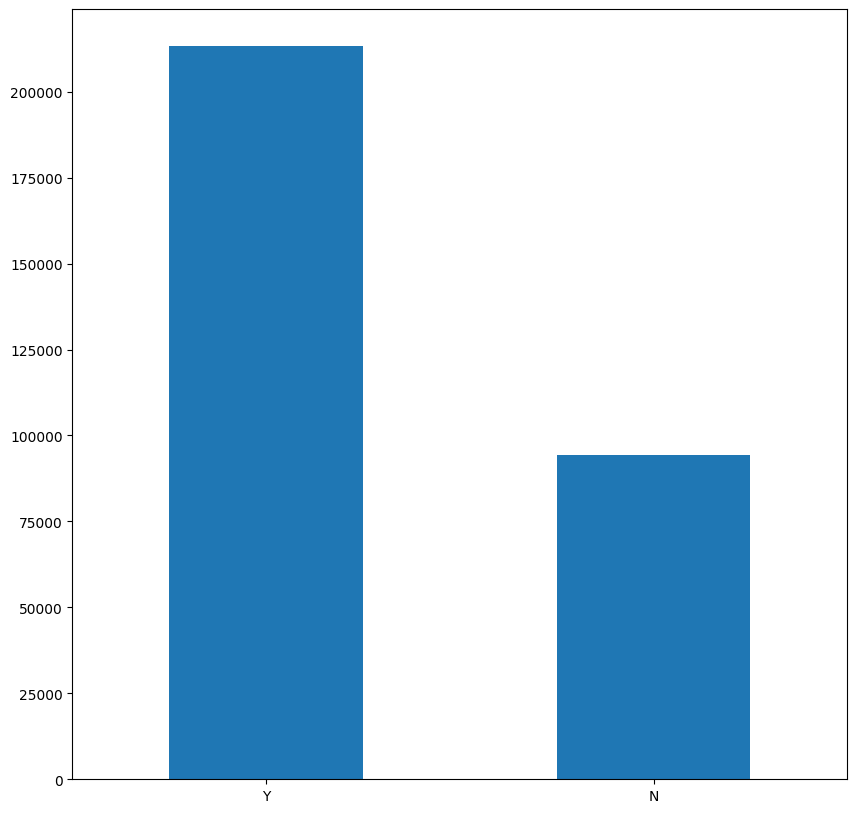

In [129]:
plt.figure(figsize = (10, 10))
df_train['FLAG_OWN_REALTY'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

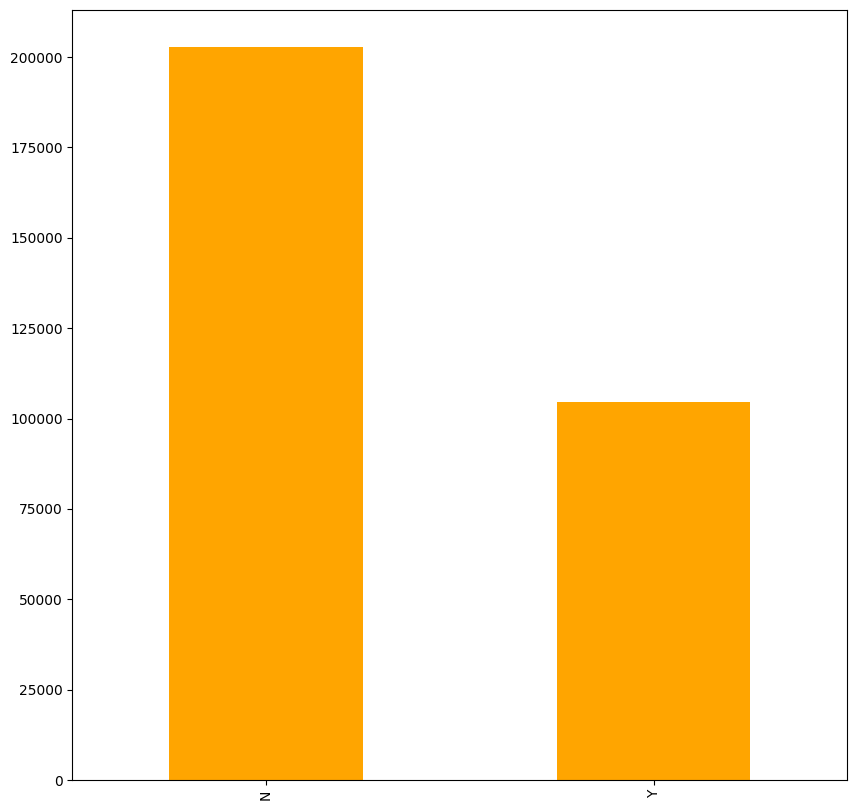

In [130]:
plt.figure(figsize = (10, 10))
df_train['FLAG_OWN_CAR'].value_counts().plot(kind = 'bar', color = 'orange')
plt.show()

These plots visualize the distribution of whether customers own real estate (FLAG_OWN_REALTY) or own a car (FLAG_OWN_CAR). Both are important factors in assessing a customer’s financial status and loan default risk.

## Kdeplot of AMT_INCOME_TOTAL

A Kernel Density Estimate (KDE) plot is used to visualize the distribution of customers' total income. The plot shows a smoothed probability density of the income values.

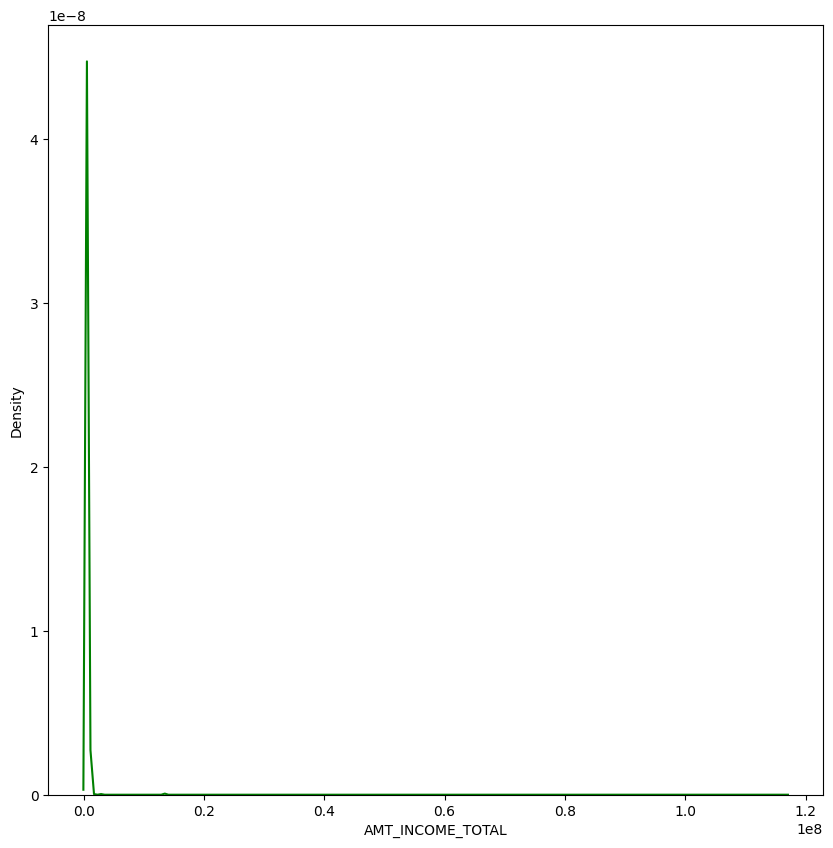

In [131]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_train['AMT_INCOME_TOTAL'], color = 'green')
plt.show()

## Countplot of Target

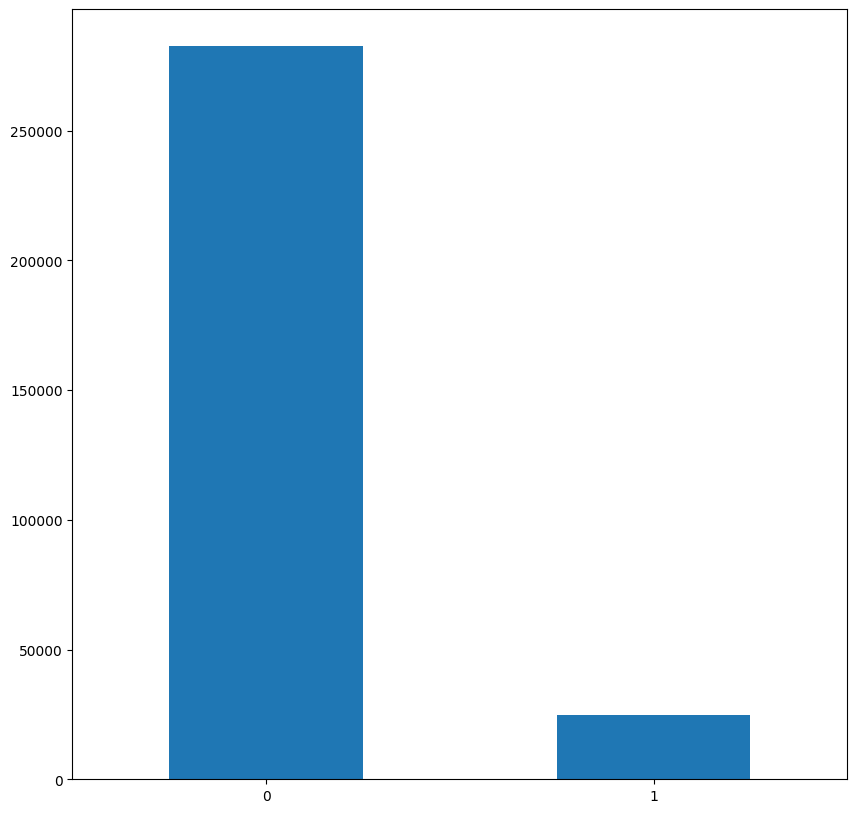

In [133]:
plt.figure(figsize = (10, 10))
df_train['TARGET'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

This bar chart visualizes the TARGET variable, which indicates whether the customer defaulted (1) or not (0). The plot shows the imbalance in the dataset, with far fewer customers defaulting compared to those who did not.

## Kdeplot of AMT_INCOME_TOTAL

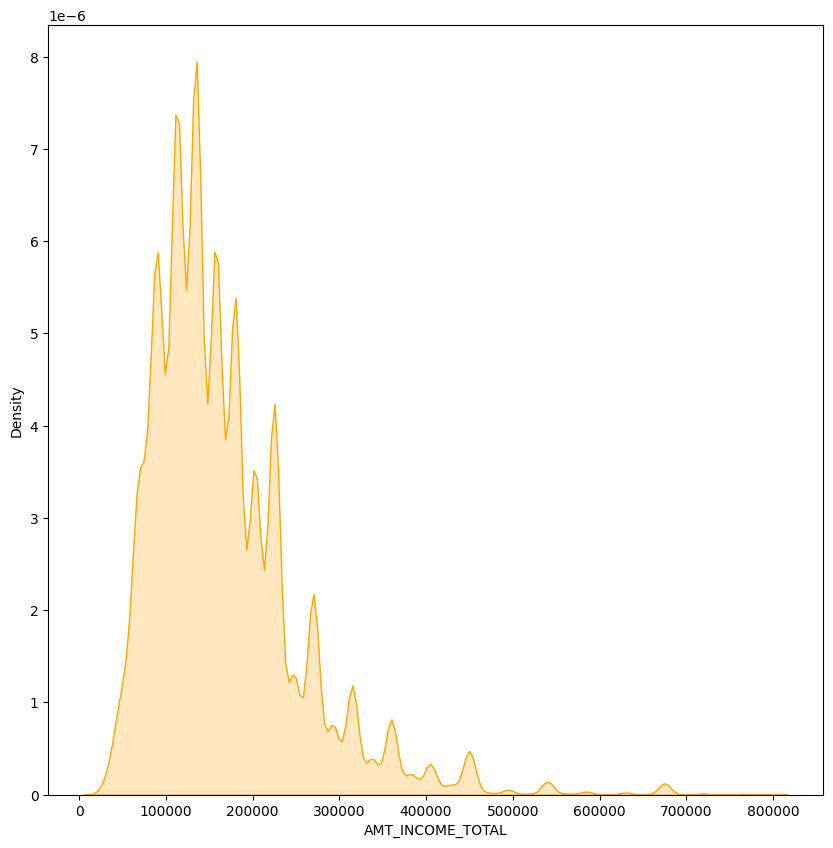

In [134]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_train[df_train['AMT_INCOME_TOTAL'] < 800000]['AMT_INCOME_TOTAL'], fill = True, color = 'orange')
plt.show()

## Kdeplot of AMT_CREDIT

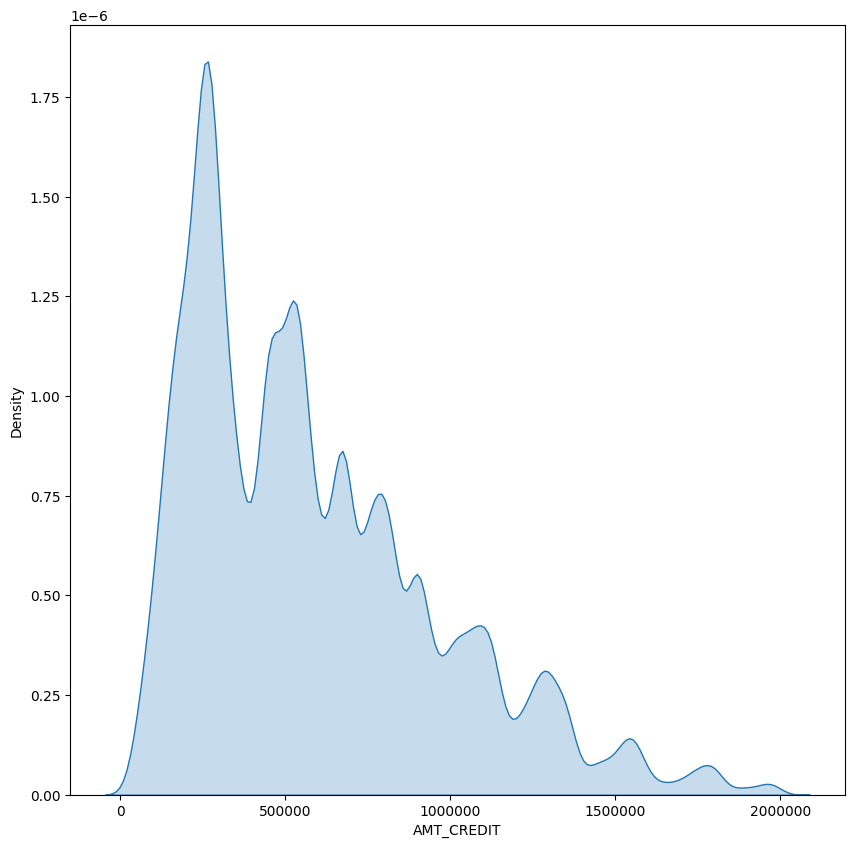

In [135]:
plt.figure(figsize = (10, 10))
sns.kdeplot(df_train[df_train['AMT_CREDIT'] < 2000000]['AMT_CREDIT'], fill = True)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

This plot shows the distribution of credit amounts, excluding values above 2,000,000 to focus on more common credit amounts.

In [139]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [141]:
df_train['YEARS_BEGINEXPLUATATION_AVG']

0         0.9722
1         0.9851
2            NaN
3            NaN
4            NaN
           ...  
307506    0.9876
307507    0.9727
307508    0.9816
307509    0.9771
307510    0.9881
Name: YEARS_BEGINEXPLUATATION_AVG, Length: 307507, dtype: float64

In [162]:
numeric_data.head()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_6,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,1,0.972200,0.083300,0.972200,0.083300,0.972200,100002
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,0.985100,0.291700,0.985100,0.291700,0.985100,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100004
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,1,1,0,0.977735,0.226284,0.977065,0.222317,0.977752,100007


In [163]:
categorical_data.head()

,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,NAME_TYPE_SUITE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE
0,WEDNESDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Business Entity Type 3,Single / not married,Cash loans
1,MONDAY,Higher education,Family,House / apartment,N,State servant,F,N,School,Married,Cash loans
2,MONDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,Y,Government,Single / not married,Revolving loans
3,WEDNESDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,F,N,Business Entity Type 3,Civil marriage,Cash loans
4,THURSDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Religion,Single / not married,Cash loans


In [165]:
categorical_data['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [166]:
categorical_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [168]:
categorical_data['NAME_TYPE_SUITE'].describe()

count            307507
unique                7
top       Unaccompanied
freq             249815
Name: NAME_TYPE_SUITE, dtype: object

In [176]:
categorical_data.head()

,WEEKDAY_APPR_PROCESS_START,NAME_EDUCATION_TYPE,NAME_TYPE_SUITE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,NAME_INCOME_TYPE,CODE_GENDER,FLAG_OWN_CAR,ORGANIZATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE
0,WEDNESDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Business Entity Type 3,Single / not married,Cash loans
1,MONDAY,Higher education,Family,House / apartment,N,State servant,F,N,School,Married,Cash loans
2,MONDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,Y,Government,Single / not married,Revolving loans
3,WEDNESDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,F,N,Business Entity Type 3,Civil marriage,Cash loans
4,THURSDAY,Secondary / secondary special,Unaccompanied,House / apartment,Y,Working,M,N,Religion,Single / not married,Cash loans


In [177]:
numeric_data.head()

,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_6,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,SK_ID_CURR
0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0,0,...,0,0,0,1,0.972200,0.083300,0.972200,0.083300,0.972200,100002
1,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0,0,...,0,0,0,0,0.985100,0.291700,0.985100,0.291700,0.985100,100003
2,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100004
3,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0,0,...,0,0,0,0,0.977735,0.226284,0.977065,0.222317,0.977752,100006
4,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0,0,...,0,1,1,0,0.977735,0.226284,0.977065,0.222317,0.977752,100007


In [178]:
numeric_data.columns

Index(['DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_2', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'FLAG_DOCUMENT_11', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'CNT_CHILDREN', 'FLAG_DOCUMENT_13', 'DAYS_BIRTH',
       'HOUR_APPR_PROCESS_START', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
  

In [182]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Model building and Training

In [186]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Splitting and Scaling

The numeric features are split into training and cross-validation (CV) sets using a 70-30 train-test split ratio with the target variable (y) separated from the input features (X).

In [187]:
numeric_data_with_target_dropped = numeric_data.drop('TARGET', axis=1)
X = numeric_data_with_target_dropped
y = df_train['TARGET'].values

In [188]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=101)

We standardize the numerical features, ensuring that all the features have a mean of 0 and a standard deviation of 1, 

In [189]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_cv_standardized = scaler.transform(X_cv)

## Handling Class Imbalance

The dataset is highly imbalanced, with far more non-defaulters than defaulters. To address this, multiple resampling techniques from the imblearn library were used:

*RandomOverSampler*: This technique duplicates instances from the minority class (defaulters) to balance the dataset.

*Tomek Links*: This under-sampling technique removes instances that are ambiguously classified between the classes.

*SMOTE (Synthetic Minority Over-sampling Technique)*: This technique generates synthetic instances of the minority class.

*NearMiss*: An under-sampling technique that selects examples of the majority class that are closest to the minority class.

In [190]:
def sampler_function(data_x, data_y, sampler=0, random_state=101):
    if sampler == 0:
        sampler = RandomOverSampler(random_state=random_state)
    elif sampler == 1:
        sampler = TomekLinks()
    elif sampler == 2:
        sampler = SMOTE()
    else:
        sampler = NearMiss()
    X_transformed, y_transformed = sampler.fit_resample(data_x, data_y)
    
    print('Original dataset shape:', data_y.shape)
    print('Resample dataset shape:', y_transformed.shape)
    
    return X_transformed, y_transformed


In [191]:
X_train, y_train = sampler_function(X_train_standardized, y_train, sampler=0)
X_cv, y_cv = sampler_function(X_cv_standardized, y_cv, sampler=0)

Original dataset shape: (215254,)
Resample dataset shape: (395864,)
Original dataset shape: (92253,)
Resample dataset shape: (169500,)


# Logistic Regression

Logistic regression is a statistical method used for binary classification problems, where the target variable has two possible outcomes (e.g., default or no default). Unlike linear regression, which predicts continuous values, logistic regression predicts the probability of a specific class or event.

We create and train a logistic regression model was trained using the resampled training dataset. 
This model attempts to predict whether a loan applicant will default (target variable) based on the features in the dataset.

In [193]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

## Evaluating the model

In [194]:
mae = mean_absolute_error(y_predictions, y_cv)
acc = accuracy_score(y_predictions, y_cv)
print(f"Mean Absolute Error: {mae}")
print(f"Accuracy: {acc}")

Mean Absolute Error: 0.355834808259587
Accuracy: 0.644165191740413


Mean Absolute Error (MAE): The MAE for the logistic regression model on the cross-validation set was 0.3558, which indicates the average error between the predicted and actual values.

Accuracy: The accuracy of the model was 64.42%, meaning the model correctly predicted the target class for 64.42% of the instances in the cross-validation dataset.

## Confusion matrix

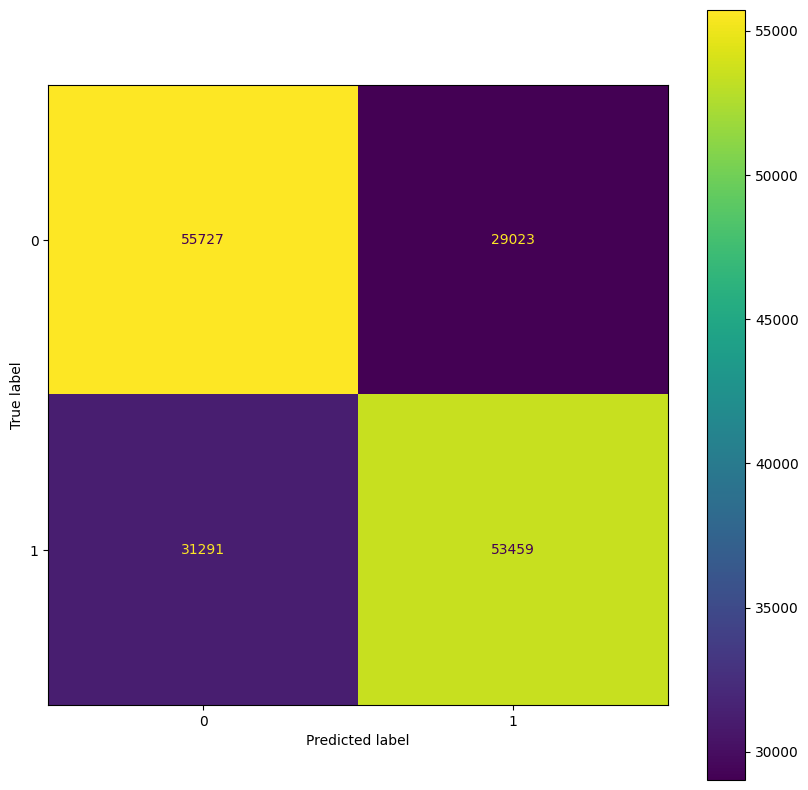

In [195]:
cm = confusion_matrix(y_cv, y_predictions)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

## Receiver Operating Characteristic (ROC) Curve and AUC:

The ROC curve is a graphical representation of the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity) at various thresholds.

The Area Under the Curve (AUC) is 0.6985, indicating the ability of the model to distinguish between defaulters and non-defaulters. An AUC closer to 1 indicates a better-performing model.

AUC for our classifier is: 0.6984886881248857


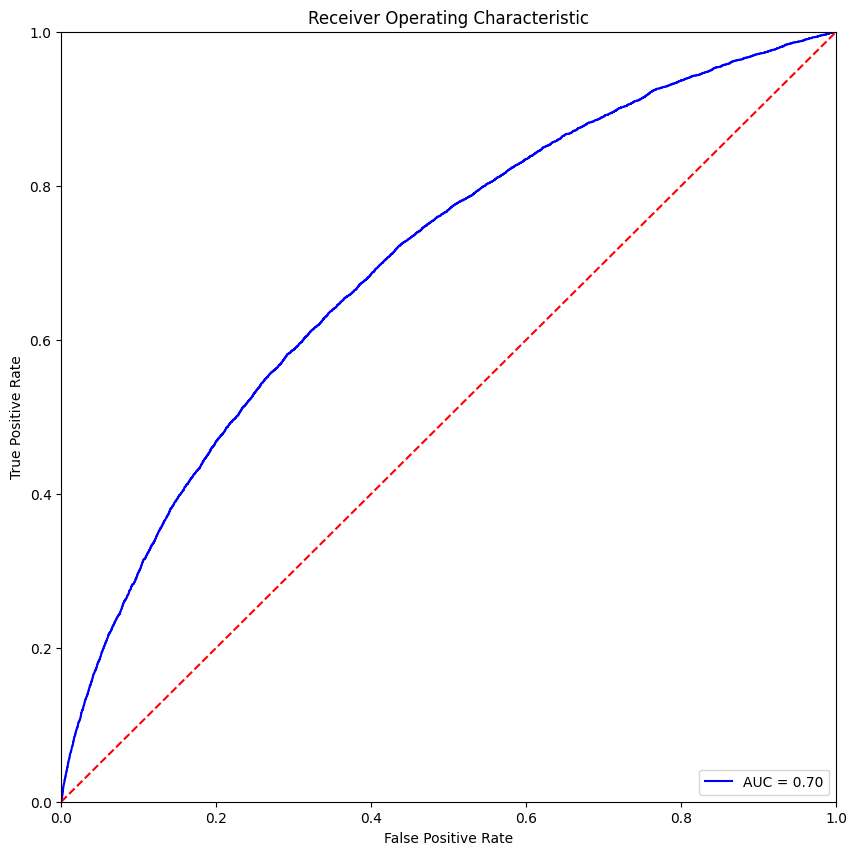

In [197]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

#AOC
print(f"AUC for our classifier is: {roc_auc}")

# ROC
plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive Bayes Classifier

Naive Bayes is a probabilistic classification algorithm based on Bayes' Theorem, with an assumption of independence among features. The classifier is termed "naive" because it assumes that all features are independent of each other, which may not be the case in real-world datasets. 

In [198]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

In a Gaussian Naive Bayes classifier, the likelihood of the features is assumed to follow a Gaussian (normal) distribution. Lets go ahead and train our guassian naive bayes model and make predictions

In [199]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [200]:
y_predictions = model.predict(X_cv)

## Evaluation

## Confusion matrix

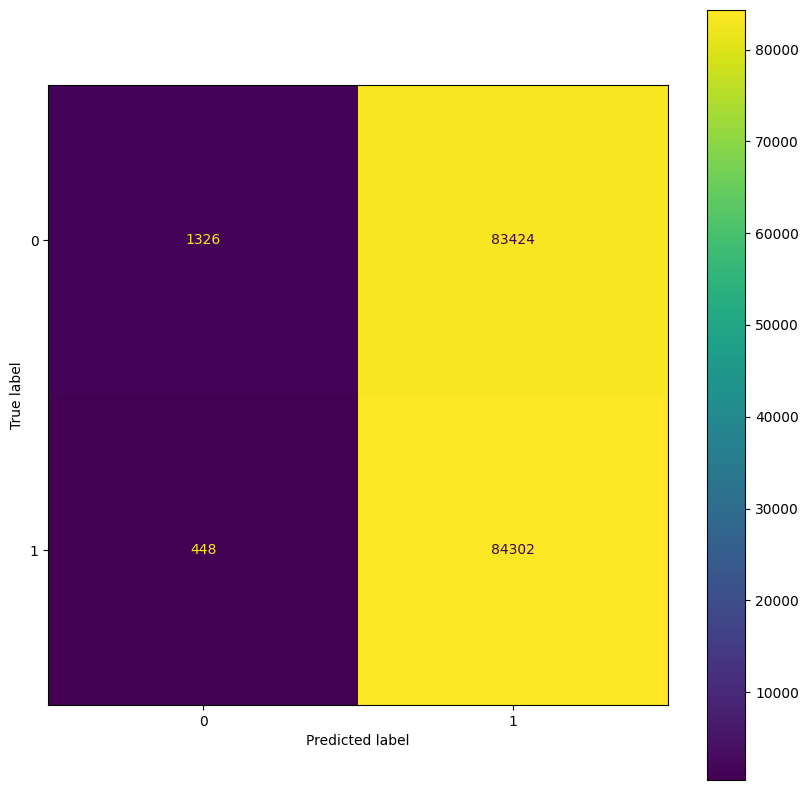

In [201]:
cm = confusion_matrix(y_cv, y_predictions)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

## ROC curve and AUC:

In [202]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

AUC for our classifier is: 0.6442482177495845


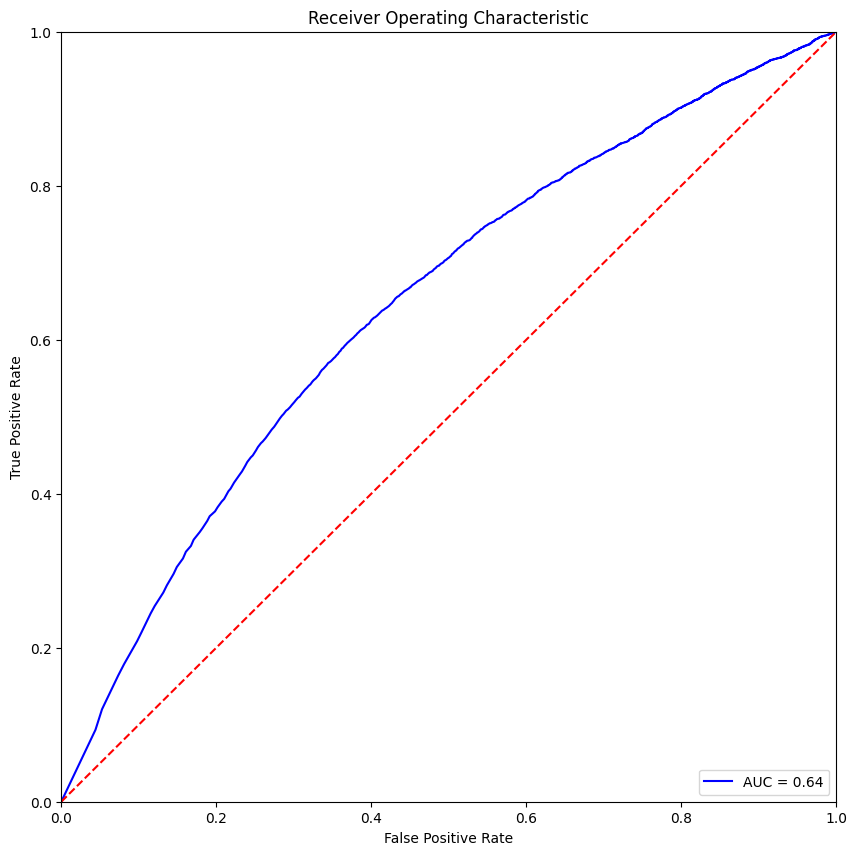

In [203]:
print(f"AUC for our classifier is: {roc_auc}")

plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decison Tree Classifier

A Decision Tree Classifier is a type of supervised learning algorithm used primarily for classification tasks. It classifies data by learning decision rules derived from the features of the training data.

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

Lets define and train our decision tree classifier model

In [205]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [206]:
y_predictions = model.predict(X_cv)

## Evaluation

## Confusion Matrix

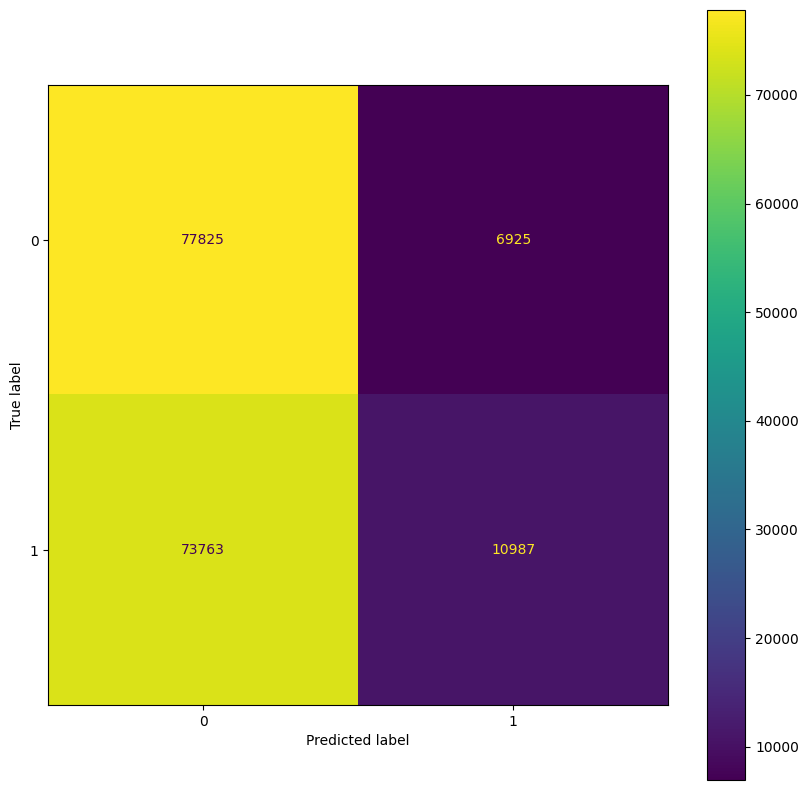

In [207]:
cm = confusion_matrix(y_cv, y_predictions)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

In [208]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.51      0.92      0.66     84750
           1       0.61      0.13      0.21     84750

    accuracy                           0.52    169500
   macro avg       0.56      0.52      0.44    169500
weighted avg       0.56      0.52      0.44    169500



The classification report provides detailed metrics, including:

Precision: The ratio of true positives to predicted positives.

Recall: The ratio of true positives to actual positives (also called sensitivity).

F1-Score: The harmonic mean of precision and recall.

Support: The number of occurrences of each class in the dataset.

## ROC curve and AUC

AUC for our classifier is: 0.6442482177495845


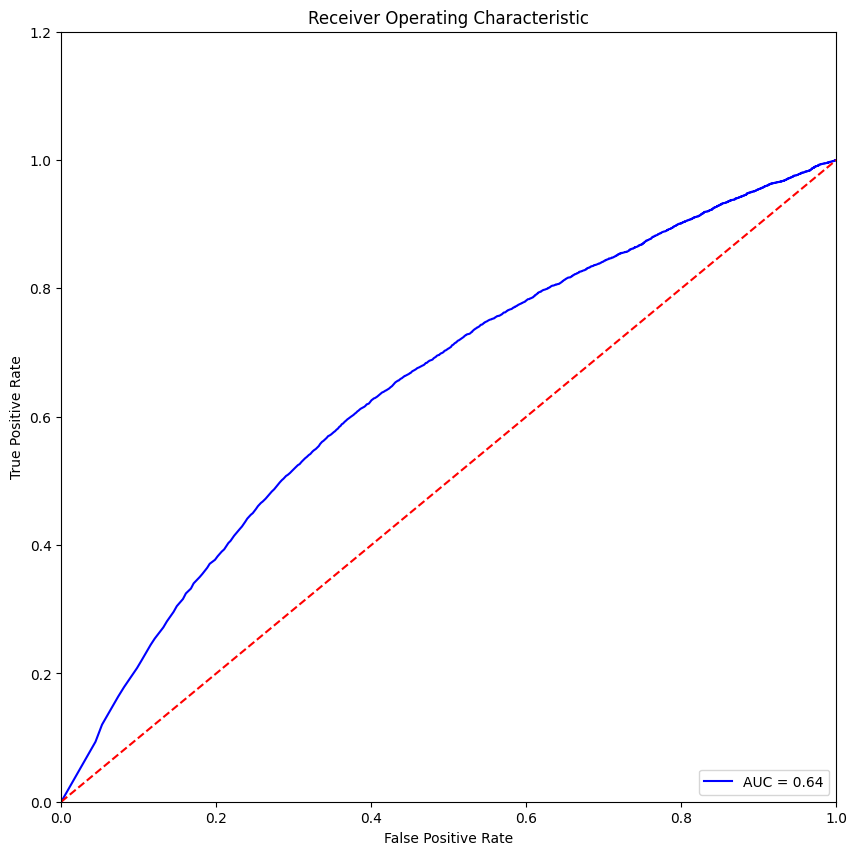

In [209]:
print(f"AUC for our classifier is: {roc_auc}")

plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random Forest Classifier

The Random Forest Classifier is an ensemble learning method used for classification (and regression) tasks. It builds multiple decision trees during training and outputs the mode (most common output) of the individual trees for classification tasks.

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

Lets train our model and make predictins

In [211]:
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [212]:
y_predictions = model.predict(X_cv)

## Evaluaion

In [213]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     84750
           1       0.84      0.01      0.01     84750

    accuracy                           0.50    169500
   macro avg       0.67      0.50      0.34    169500
weighted avg       0.67      0.50      0.34    169500



## Confusion matrix

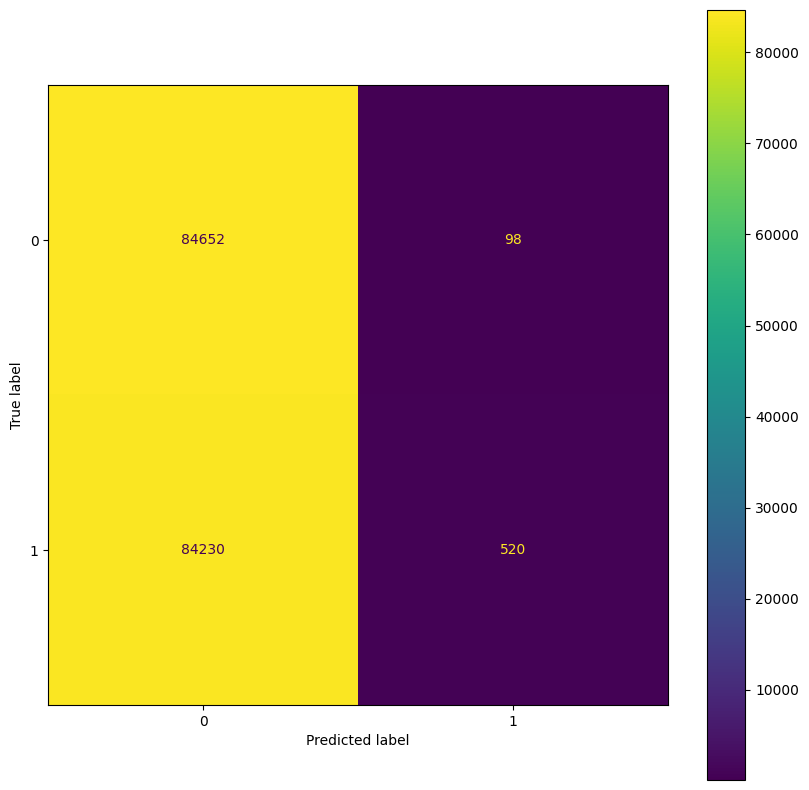

In [214]:
cm = confusion_matrix(y_cv, y_predictions)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

## ROC Curve and AOC

AUC for our classifier is: 0.682279249989123


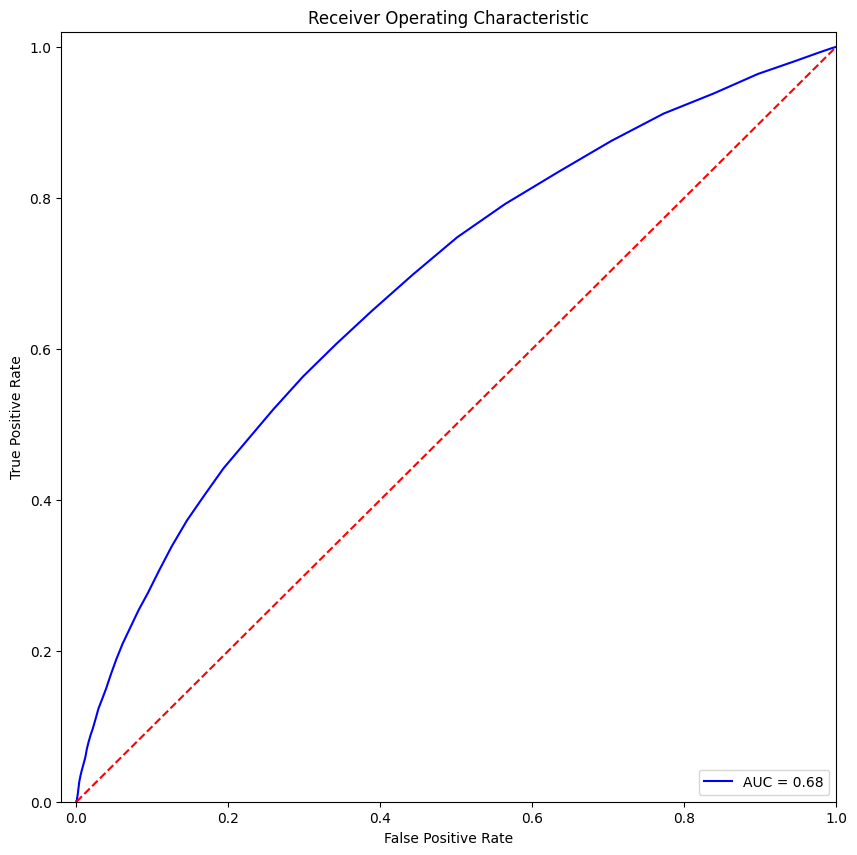

In [215]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

print(f"AUC for our classifier is: {roc_auc}")

plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Comparison Report

In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [217]:
model_comparison = {}

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1)
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_predictions = model.predict(X_cv)
    y_probabilities = model.predict_proba(X_cv)[:, 1]
    
    model_comparison[model_name] = {
        "Accuracy": accuracy_score(y_cv, y_predictions),
        "Precision": precision_score(y_cv, y_predictions),
        "Recall": recall_score(y_cv, y_predictions),
        "F1-Score": f1_score(y_cv, y_predictions),
        "AUC-ROC": roc_auc_score(y_cv, y_probabilities),
        "Confusion Matrix": confusion_matrix(y_cv, y_predictions)
    }

In [218]:
import pandas as pd
comparison_df = pd.DataFrame(model_comparison).T
print(comparison_df)

for model_name in model_comparison:
    print(f"\nConfusion Matrix for {model_name}:")
    print(model_comparison[model_name]["Confusion Matrix"])


                     Accuracy Precision    Recall  F1-Score   AUC-ROC  \
Logistic Regression  0.644165  0.648129  0.630785  0.639339  0.698489   
Naive Bayes           0.50518  0.502617  0.994714  0.667802  0.644248   
Decision Tree        0.524425  0.614365  0.131209  0.216237  0.524425   
Random Forest        0.502614  0.842349  0.006431  0.012764  0.682744   

                                     Confusion Matrix  
Logistic Regression  [[55727, 29023], [31291, 53459]]  
Naive Bayes             [[1326, 83424], [448, 84302]]  
Decision Tree         [[77770, 6980], [73630, 11120]]  
Random Forest            [[84648, 102], [84205, 545]]  

Confusion Matrix for Logistic Regression:
[[55727 29023]
 [31291 53459]]

Confusion Matrix for Naive Bayes:
[[ 1326 83424]
 [  448 84302]]

Confusion Matrix for Decision Tree:
[[77770  6980]
 [73630 11120]]

Confusion Matrix for Random Forest:
[[84648   102]
 [84205   545]]


**Observations**: 

Logistic Regression emerges as the best performer overall in this comparison, providing the most balanced trade-off between accuracy, precision, and recall, with a good AUC-ROC score.

Naive Bayes is highly recall-oriented but lacks balance.

Decision Tree and Random Forest perform underwhelmingly, especially in terms of recall, indicating they are not well-suited for this dataset.

Decision Tree and Random Forest classifiers typically benefit from hyperparameter tuning, especially in cases involving imbalanced datasets

# Hyperparameter Tuning (Random Forest Model)

Hyperparameter tuning is the process of finding the optimal values for the hyperparameters of a machine learning model. Hyperparameters are settings that are defined before the training process and control the behavior of the training algorithm. 

In [219]:
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

In [220]:
# Define the parameter grid for tuning
param_grid = {'n_estimators': [10, 20]}

# Define the classifier used
model = RandomForestClassifier(n_jobs = -1)

# Create the grid search object
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3)

# Create a progress bar
pbar = tqdm(total=len(grid_search.param_grid['n_estimators']))

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Update the progress bar
pbar.update(1)

# Close the progress bar
pbar.close()

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

 50%|██████████████████████████████████████████                                          | 1/2 [00:54<00:54, 54.82s/it]


In [221]:
print(best_params)

{'n_estimators': 20}


The optimal number of estimators (n_estimators) for the Random Forest model was found to be 20.

# Prediction with tuned model (Random forest)

In [255]:
model = RandomForestClassifier(n_jobs=-1, n_estimators=20) 
model.fit(X_train, y_train)
y_predictions = model.predict(X_cv)

In [256]:
print(classification_report(y_predictions, y_cv))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86    107283
           1       0.71      0.97      0.82     62217

    accuracy                           0.85    169500
   macro avg       0.85      0.87      0.84    169500
weighted avg       0.88      0.85      0.85    169500



## Confusion Matrix

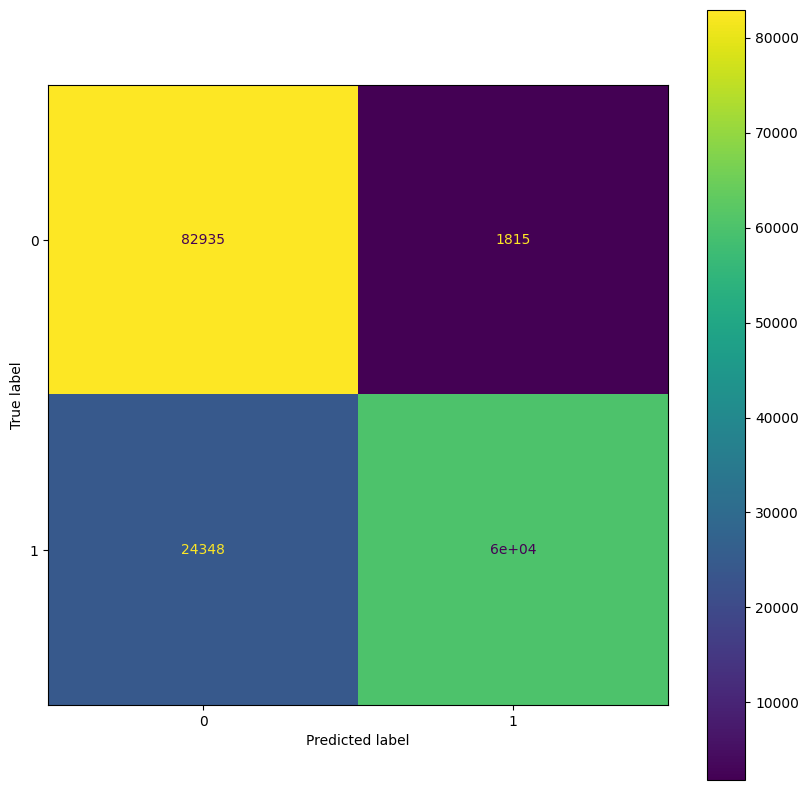

In [257]:
cm = confusion_matrix(y_cv, y_predictions)
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax)
plt.show()

## ROC curve and AOC

AUC for our classifier is: 0.7970442477876106


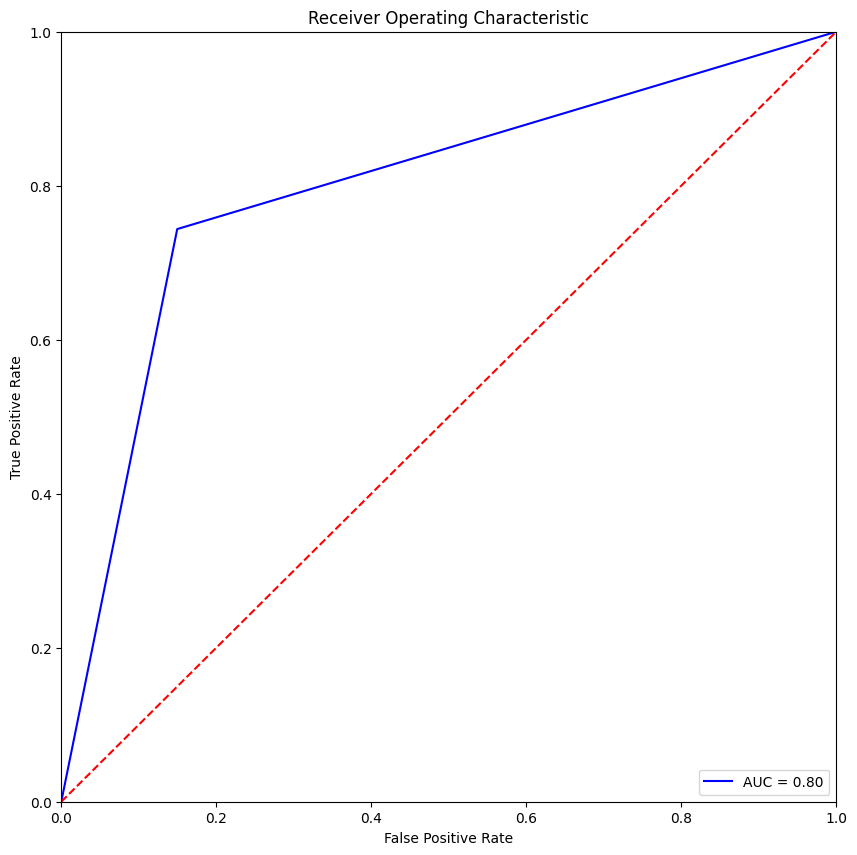

In [258]:
print(f"AUC for our classifier is: {roc_auc}")

plt.figure(figsize=(10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After training with the hyper parameter tuned parameters we can see our Random Forest model is performing well with with an overall accuracy of 85% and AUC score of 0.797

# Conclusions

* Several models were trained and evaluated on the dataset, including Logistic Regression, Naive Bayes, Decision Tree, and Random Forest


* Logistic Regression achieved an accuracy of 64.42% with an AUC of 0.698, showing moderate predictive power. 


* Naive Bayes had a high recall for classifying defaulters but performed poorly in overall accuracy  of about 50.52% due to imbalanced data with an AUC of 0.644.




* The Decision Tree classifier gave an accuracy of 52.44%, which improved recall slightly, but it had a lower AUC of 0.52.



* The Random Forest model initially performed similarly to the Decision Tree but achieved much better performance after hyperparameter tuning with accuracy increased significantly to 85%, and its AUC improved to 0.797.

# Challenges Faced

**Handling Missing Values**: The dataset had a significant number of missing values in both numerical and categorical columns, which required careful imputation techniques to preserve data integrity.

**Data Imbalance**: The target variable had an imbalance, with far fewer loan defaulters compared to non-defaulters, necessitating the use of SMOTE to ensure effective model training.

**Hyperparameter Tuning**: Fine-tuning the Random Forest model’s hyperparameters was time-consuming but critical to improving the model’s performance.

**Combining Categorical and Numerical Data**: Managing and encoding categorical data while scaling numerical data was complex, requiring careful handling to ensure smooth model training.